# Basic Example

In [1]:
import awkward as ak
import numpy as np
import hist
import json
from importlib import resources
import matplotlib.pyplot as plt
import mplhep as hep
from cycler import cycler
from datetime import date

In [2]:
acab_palette = ["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#717581", "#92dadd"]
#hep.styles.cms.CMS["axes.prop_cycle"] # = cycler("color", acab_palette[::-1])
hep.style.use("CMS")

In [3]:
# Get the current date
current_date = date.today()
# Format the date
formatted_date = current_date.strftime("%y%m%d")


In [4]:
MULTICLASS = True
SPLIT = False

processes = [
    "bH_5FS_FXFX_M125_2017",
    "cH_4FS_FXFX_M125_2017",
    "ggh_M125_2017",
    "tth_M125_2017",
    "vbf_M125_2017",
    "vh_M125_2017"
]

if not MULTICLASS:
    ext = f"{formatted_date}_bdt_single_class_CvsL_ordering"
    cats = [
        "bTag_high",
        "bTag_low",
        "cTag_high",
        "cTag_low",
        "lbTag_high",
        "lbTag_low",
        "lcTag_high",
        "lcTag_low"
    ]
else:
    ext = f"{formatted_date}_bdt_multiclass_CvsL_ordering_SM_cats"
    cats = [
        "NOTAG"
    ]

In [5]:
fileset = {}
fileset_data = {}

for i, proc in enumerate(processes):
    fileset[proc] = {}
    #input_dir = f"/pnfs/psi.ch/cms/trivcat/store/user/bevila_t/test2/phys/xpluscharm/HiggsDNA_output/higgs_dna_HpC_signal_samples_multiclass_fixed_variables_241111/merged/{proc}/" # this is CvsL ordered with multiclass bdt
    input_dir = f"/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/master_240821/higgs-dna-tiziano-bevilacqua/output/HpC_signals_genJets_fiducial_cuts/merged/{proc}/" # this is CvsL ordered with multiclass bdt
    for cat in cats:
        fileset[proc][cat] = ak.from_parquet(f"{input_dir}/{cat}_merged.parquet")
        fileset_data[cat] = ak.from_parquet(f"{input_dir}/{cat}_merged.parquet")

#input_dir = "/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/master_240821/higgs-dna-tiziano-bevilacqua/output/output_HpC_PNet_ordered_data_241008/merged/Data_2017"
# input_dir = "/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/master_240821/higgs-dna-tiziano-bevilacqua/output/HpC_data_multiclass_241024/merged/Data_2017"
input_dir = "/pnfs/psi.ch/cms/trivcat/store/user/bevila_t/test2/phys/xpluscharm/HiggsDNA_output/higgs_dna_Data_2017_multiclass_241031/merged/Data_2017"
#for cat in cats:
#    fileset_data[cat] = ak.from_parquet(f"{input_dir}/allData_{cat}_merged.parquet")


FileNotFoundError: [Errno 2] Failed to open local file '/work/bevila_t/HpC_Analysis/HiggsDNA/coffea/myfork/master_240821/higgs-dna-tiziano-bevilacqua/output/HpC_signals_genJets_fiducial_cuts/merged/bH_5FS_FXFX_M125_2017//NOTAG_merged.parquet'. Detail: [errno 2] No such file or directory

In [6]:
lumi = {
    "2016" : 35.9,
    "2017" : 41.5,
    "2018" : 59.2
}

norm_1fb = {
    "ggh": 48.58 * 0.00227 * 1000,
    "tth": 0.5071 * 0.00227 * 1000,
    "vbf": 3.782 * 0.00227 * 1000,
    "vh": 2.2555 * 0.00227 * 1000,
    "bh": 0.6654 * 0.00227 * 1000,
    "ch": 0.09013 * 0.00227 * 1000,
}

In [7]:
for f in fileset[[*processes][0]][[*cats][0]].fields:
    if "eight" not in f:
        print(f)

bdt_score
dZ
CMS_hgg_mass
event
pt
eta
phi
dijet_pt
dijet_eta
dijet_phi
dijet_mass
LeadPhoton_pt_mgg
LeadPhoton_eta
LeadPhoton_mvaID
SubleadPhoton_pt_mgg
SubleadPhoton_eta
SubleadPhoton_mvaID
LeadPhoton_pt
SubleadPhoton_pt
LeadPhoton_energy
SubleadPhoton_energy
Diphoton_cos_dPhi
sigmaMrv
sigmaMwv
PV_score
nPV
nPU
rho
n_jets
n_b_jets_loose
n_b_jets_medium
first_jet_pt
first_jet_eta
first_jet_phi
first_jet_mass
first_jet_hFlav
first_jet_DeepFlavour_CvsL
first_jet_DeepFlavour_CvsB
first_jet_DeepFlavour_B
first_jet_DeepFlavour_QG
first_jet_particleNetAK4_CvsL
first_jet_particleNetAK4_CvsB
first_jet_particleNetAK4_B
first_jet_n_sv
first_jet_n_muons
first_jet_n_electrons
first_pt_jet_pt
first_pt_jet_eta
first_pt_jet_phi
first_pt_jet_mass
first_pt_jet_hFlav
first_pt_jet_DeepFlavour_CvsL
first_pt_jet_DeepFlavour_CvsB
first_pt_jet_DeepFlavour_B
first_pt_jet_DeepFlavour_QG
second_jet_pt
second_jet_eta
second_jet_phi
second_jet_mass
second_jet_hFlav
second_jet_DeepFlavour_CvsL
second_jet_DeepFlav

In [8]:
yields = {}
yields_proc = {
    "ggh": {},
    "ggh_c": {},
    "ggh_b": {},
    "ggh_l": {},
    "tth": {},
    "vbf": {},
    "vh": {},
    "bh": {},
    "ch": {},
}

yields_cats = {}
for c in cats:
    yields_cats[c] = 0.


for sample in yields_proc:
    if sample == "ggh":
        for flav in ["c", "b", "l"]:
            yields_proc[f"{sample}_{flav}"]["tot"] = 0
    yields_proc[sample]["tot"] = 0
    for cat in cats:
        yields_proc[sample][cat] = 0
        if sample == "ggh":
            for flav in ["c", "b", "l"]:
                yields_proc[f"{sample}_{flav}"][cat] = 0
for sample in [*fileset]:
    print("-"*60)
    print("sample:", sample)
    yields[sample] = {}
    yields[sample]["tot"] = 0
    tot_num_ev = 0
    for cat in cats:
        if len(fileset[sample][cat].weight) and (ak.sum(fileset[sample][cat]["weight"]) > 0):
            fileset[sample][cat]["weight_norm"] = fileset[sample][cat].weight * norm_1fb[sample.split("_")[0].lower()] * lumi["2017"]
            fileset[sample][cat]["square_weight"] = fileset[sample][cat].weight_norm ** 2
            yields[sample][cat] = ak.sum(fileset[sample][cat]["weight_norm"])
            yields[sample]["tot"] += ak.sum(fileset[sample][cat]["weight_norm"])
            yields_proc[sample.split("_")[0].lower()][cat] += ak.sum(fileset[sample][cat]["weight_norm"])
            yields_proc[sample.split("_")[0].lower()]["tot"] += ak.sum(fileset[sample][cat]["weight_norm"])
            tot_num_ev += len(fileset[sample][cat]["weight_norm"])
            if "ggh" in sample and SPLIT:
                yields_proc[f"{sample.split('_')[0].lower()}_{sample.split('_')[3].lower()}"][cat] += ak.sum(fileset[sample][cat]["weight_norm"])
                yields_proc[f"{sample.split('_')[0].lower()}_{sample.split('_')[3].lower()}"]["tot"] += ak.sum(fileset[sample][cat]["weight_norm"])
            yields_cats[cat] += ak.sum(fileset[sample][cat]["weight_norm"])
            print("   - cat:", cat, "events", yields[sample][cat])
            print("   - cat:", "tot", "events", yields[sample]["tot"])
            print("   - cat:", "num", "events", tot_num_ev)
        else:
            fileset[sample][cat]["weight_norm"] = 0
            fileset[sample][cat]["square_weight"] = 0
            yields[sample][cat] = 0
            print("   - cat:", cat, "events", 0), 

------------------------------------------------------------
sample: bH_5FS_FXFX_M125_2017
   - cat: NOTAG events 17.119309208223203
   - cat: tot events 17.119309208223203
   - cat: num events 1112236
------------------------------------------------------------
sample: cH_4FS_FXFX_M125_2017
   - cat: NOTAG events 1.9375755527245204
   - cat: tot events 1.9375755527245204
   - cat: num events 1287404
------------------------------------------------------------
sample: ggh_M125_2017
   - cat: NOTAG events 1100.5666363482974
   - cat: tot events 1100.5666363482974
   - cat: num events 264487
------------------------------------------------------------
sample: tth_M125_2017
   - cat: NOTAG events 24.739860160665078
   - cat: tot events 24.739860160665078
   - cat: num events 421289
------------------------------------------------------------
sample: vbf_M125_2017
   - cat: NOTAG events 124.68729183156509
   - cat: tot events 124.68729183156509
   - cat: num events 1496776
----------------

In [21]:
for sample in [*fileset]:
    print("-"*60)
    print("sample:", sample)
    for cat in cats:
        if len(fileset[sample][cat].weight) > 1:
            filter_sig_low = (
                (fileset[sample][cat]["n_jets"] > 0) & 
                (fileset[sample][cat]["bdt_score"] > 0.8) & 
                (fileset[sample][cat]["CMS_hgg_mass"] > 100) & 
                (fileset[sample][cat]["CMS_hgg_mass"] < 180) &
                (fileset[sample][cat]["ggh_vs_hb_bdt_sig_score"] <= 0.7) &
                (fileset[sample][cat]["ggh_vs_hb_bdt_tth_score"] <= 0.9) &
                (fileset[sample][cat]["ggh_vs_hb_bdt_vbf_score"] <= 0.9) &
                (fileset[sample][cat]["ggh_vs_hb_bdt_vh_score"] <= 0.85)
            )
            filter_sig_high = (
                (fileset[sample][cat]["n_jets"] > 0) & 
                (fileset[sample][cat]["bdt_score"] > 0.8) & 
                (fileset[sample][cat]["CMS_hgg_mass"] > 100) & 
                (fileset[sample][cat]["CMS_hgg_mass"] < 180) &
                (fileset[sample][cat]["ggh_vs_hb_bdt_sig_score"] > 0.7) &
                (fileset[sample][cat]["ggh_vs_hb_bdt_tth_score"] <= 0.9) &
                (fileset[sample][cat]["ggh_vs_hb_bdt_vbf_score"] <= 0.9) &
                (fileset[sample][cat]["ggh_vs_hb_bdt_vh_score"] <= 0.85)
            )
            filter_tth = (
                (fileset[sample][cat]["n_jets"] > 0) & 
                (fileset[sample][cat]["bdt_score"] > 0.8) & 
                (fileset[sample][cat]["CMS_hgg_mass"] > 100) & 
                (fileset[sample][cat]["CMS_hgg_mass"] < 180) &
                (fileset[sample][cat]["first_jet_DeepFlavour_CvsL"] > 0.35) &
                (fileset[sample][cat]["ggh_vs_hb_bdt_tth_score"] > 0.9) &
                (fileset[sample][cat]["ggh_vs_hb_bdt_vbf_score"] <= 0.9) &
                (fileset[sample][cat]["ggh_vs_hb_bdt_vh_score"] <= 0.85)
            )
            filter_vbf = (
                (fileset[sample][cat]["n_jets"] > 0) & 
                (fileset[sample][cat]["bdt_score"] > 0.8) & 
                (fileset[sample][cat]["CMS_hgg_mass"] > 100) & 
                (fileset[sample][cat]["CMS_hgg_mass"] < 180) &
                (fileset[sample][cat]["first_jet_DeepFlavour_CvsL"] > 0.35) &
                (fileset[sample][cat]["ggh_vs_hb_bdt_tth_score"] <= 0.9) &
                (fileset[sample][cat]["ggh_vs_hb_bdt_vbf_score"] > 0.9) &
                (fileset[sample][cat]["ggh_vs_hb_bdt_vh_score"] <= 0.85)
            )
            filter_vh = (
                (fileset[sample][cat]["n_jets"] > 0) & 
                (fileset[sample][cat]["bdt_score"] > 0.8) & 
                (fileset[sample][cat]["CMS_hgg_mass"] > 100) & 
                (fileset[sample][cat]["CMS_hgg_mass"] < 180) &
                (fileset[sample][cat]["first_jet_DeepFlavour_CvsL"] > 0.35) &
                (fileset[sample][cat]["ggh_vs_hb_bdt_tth_score"] <= 0.9) &
                (fileset[sample][cat]["ggh_vs_hb_bdt_vbf_score"] <= 0.9) &
                (fileset[sample][cat]["ggh_vs_hb_bdt_vh_score"] > 0.85)
            )
            _yields_proc = ak.sum(fileset[sample][cat]["weight_norm"][(filter_sig_high) | (filter_sig_low) | (filter_tth) | (filter_vbf) | (filter_vh)])
            tot_num_ev = len(fileset[sample][cat]["weight_norm"][(filter_sig_high) | (filter_sig_low) | (filter_tth) | (filter_vbf) | (filter_vh)])
            print("   - cat:", cat, "events", _yields_proc)
            print("   - cat:", "num", "events", tot_num_ev)

------------------------------------------------------------
sample: bH_5FS_FXFX_M125_2017
   - cat: NOTAG events 13.940889107608106
   - cat: num events 907322
------------------------------------------------------------
sample: cH_4FS_FXFX_M125_2017
   - cat: NOTAG events 1.5488231109672999
   - cat: num events 1038945
------------------------------------------------------------
sample: ggh_M125_2017
   - cat: NOTAG events 888.6026565587484
   - cat: num events 213554
------------------------------------------------------------
sample: tth_M125_2017
   - cat: NOTAG events 16.698762943697023
   - cat: num events 287875
------------------------------------------------------------
sample: vbf_M125_2017
   - cat: NOTAG events 80.71069368178448
   - cat: num events 1002947
------------------------------------------------------------
sample: vh_M125_2017
   - cat: NOTAG events 56.160703493115065
   - cat: num events 252188


In [20]:
fileset[sample][cat]["weight_norm"][fileset[sample][cat]["pt"] < 0]

<Array [] type='0 * ?float64'>

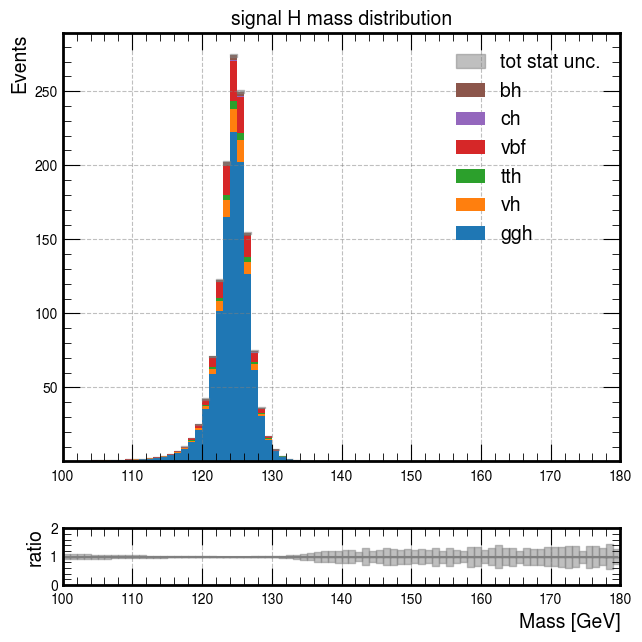

In [13]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

title = "signal H mass distribution"
var = "CMS_hgg_mass"
min_ = 100.
max_ = 180
nbins = 80

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

for sample in [*fileset]:
    for cat in cats:
        if len(fileset[sample][cat].weight) > 1:
            full_hist.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["weight_norm"], c=sample.split("_")[0].lower())
            full_hist_err.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["square_weight"], c=sample.split("_")[0].lower())
            tot_hist.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["weight_norm"], c="tot")
            tot_hist_err.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["square_weight"], c="tot")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}


# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = acab_palette
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('Mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()

[False, False, False, False, False, False, ... False, False, False, False, False]
[False, False, False, False, False, False, ... False, False, False, False, False]
[False, False, False, False, False, False, ... False, False, False, False, False]
[False, False, False, False, False, False, ... False, False, False, False, False]
[False, False, False, False, False, False, ... False, False, False, False, True]
[False, False, False, False, False, False, ... False, False, False, False, False]


/tmp/ipykernel_18829/701306076.py:118: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")


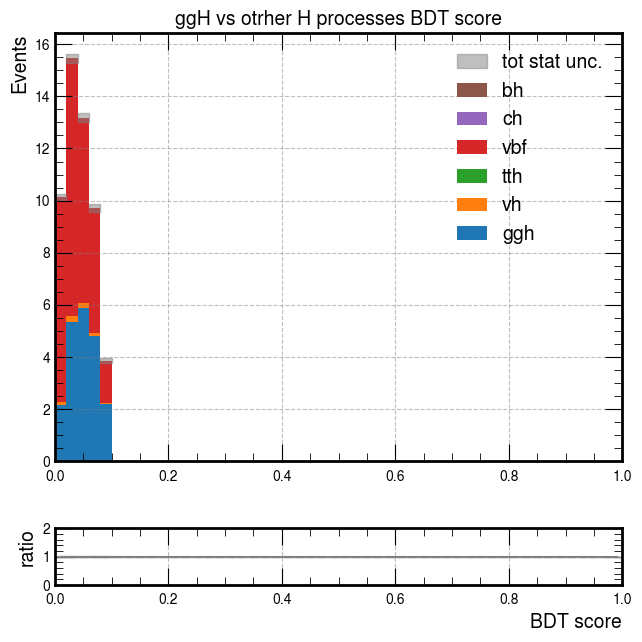

In [18]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

title = "ggH vs otrher H processes BDT score"
if not MULTICLASS:
    var = "ggh_vs_hb_bdt_score"
else:
    var = "ggh_vs_hb_bdt_sig_score"
min_ = 0.
max_ = 1
nbins = 50


LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["bh", "ch", "vbf", "tth", "vh", "ggh"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

for sample in [*fileset]:
    for cat in cats:
        if len(fileset[sample][cat].weight) > 1:
            filter = (
                (fileset[sample][cat]["bdt_score"] > 0.8) & 
                (fileset[sample][cat]["CMS_hgg_mass"] > 100) & 
                (fileset[sample][cat]["CMS_hgg_mass"] < 180) &
                (fileset[sample][cat]["ggh_vs_hb_bdt_vbf_score"] > 0.9)
            )
            print(filter)
            full_hist.fill(ax = fileset[sample][cat][var][filter], weight = fileset[sample][cat]["weight_norm"][filter], c=sample.split("_")[0].lower())
            full_hist_err.fill(ax = fileset[sample][cat][var][filter], weight = fileset[sample][cat]["square_weight"][filter], c=sample.split("_")[0].lower())
            tot_hist.fill(ax = fileset[sample][cat][var][filter], weight = fileset[sample][cat]["weight_norm"][filter], c="tot")
            tot_hist_err.fill(ax = fileset[sample][cat][var][filter], weight = fileset[sample][cat]["square_weight"][filter], c="tot")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}


# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = acab_palette
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('BDT score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()

[False, False, False, False, False, False, ... False, False, False, False, False]
[False, False, False, False, False, False, ... False, False, False, False, False]
[False, False, False, False, False, False, ... False, False, False, False, False]
[False, False, False, False, False, False, ... False, False, False, False, False]
[False, False, False, False, False, False, ... False, False, False, False, True]
[False, False, False, False, False, False, ... False, False, False, False, False]


/tmp/ipykernel_18829/2276118337.py:120: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")


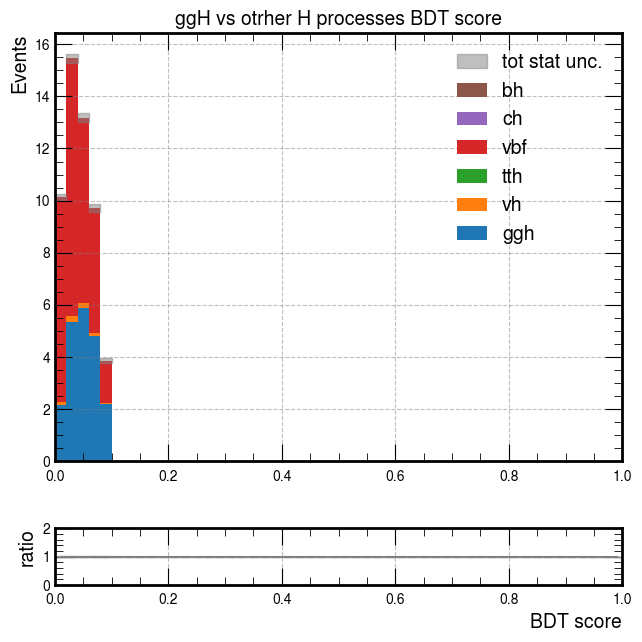

In [20]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

title = "ggH vs otrher H processes BDT score"
if not MULTICLASS:
    var = "ggh_vs_hb_bdt_score"
else:
    var = "ggh_vs_hb_bdt_sig_score"
min_ = 0.
max_ = 1
nbins = 50


LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["bh", "ch", "vbf", "tth", "vh", "ggh"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

for sample in [*fileset]:
    for cat in cats:
        if len(fileset[sample][cat].weight) > 1:
            filter = (
                (fileset[sample][cat]["bdt_score"] > 0.8) & 
                (fileset[sample][cat]["CMS_hgg_mass"] > 100) & 
                (fileset[sample][cat]["CMS_hgg_mass"] < 180) &
                (fileset[sample][cat]["ggh_vs_hb_bdt_vbf_score"] > 0.9) &
                (fileset[sample][cat]["ggh_vs_hb_bdt_tth_score"] <= 0.9) &
                (fileset[sample][cat]["ggh_vs_hb_bdt_vh_score"] <= 0.85)
            )
            print(filter)
            full_hist.fill(ax = fileset[sample][cat][var][filter], weight = fileset[sample][cat]["weight_norm"][filter], c=sample.split("_")[0].lower())
            full_hist_err.fill(ax = fileset[sample][cat][var][filter], weight = fileset[sample][cat]["square_weight"][filter], c=sample.split("_")[0].lower())
            tot_hist.fill(ax = fileset[sample][cat][var][filter], weight = fileset[sample][cat]["weight_norm"][filter], c="tot")
            tot_hist_err.fill(ax = fileset[sample][cat][var][filter], weight = fileset[sample][cat]["square_weight"][filter], c="tot")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}


# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = acab_palette
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('BDT score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()

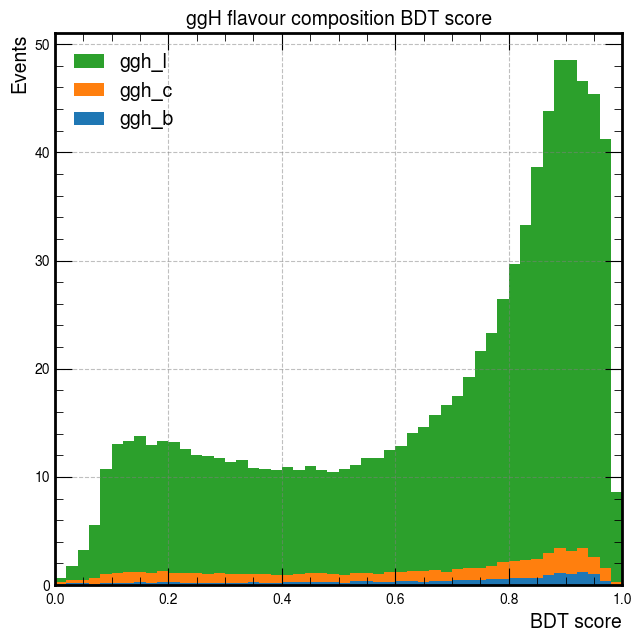

In [16]:
# lead photon eta
fig, ax0 = plt.subplots(1,1, figsize=(7, 7))

title = "ggH flavour composition BDT score"
if not MULTICLASS:
    var = "ggh_vs_hb_bdt_score"
else:
    var = "ggh_vs_hb_bdt_sig_score"
min_ = 0.
max_ = 1
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["ggh"], name="c")
LeadPhoton_et_cax_flav = hist.axis.StrCategory(["ggh_l", "ggh_c", "ggh_b"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_flav = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_flav)
full_hist_flav_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_flav)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

for sample in [*fileset]:
    for cat in cats:
        if len(fileset[sample][cat].weight) > 1:
            full_hist.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["weight_norm"], c=sample.split("_")[0].lower())
            full_hist_err.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["square_weight"], c=sample.split("_")[0].lower())
            tot_hist.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["weight_norm"], c="tot")
            tot_hist_err.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["square_weight"], c="tot")
            if "ggh" in sample:
                if "_l" in sample:
                    lab = "ggh_l"
                elif "_c" in sample:
                    lab = "ggh_c"
                else:
                    lab = "ggh_b"
                full_hist_flav.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["weight_norm"], c=lab)
                full_hist_flav_err.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["square_weight"], c=lab)
            else:
                full_hist_flav.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["weight_norm"], c="other")
                full_hist_flav_err.fill(ax = fileset[sample][cat][var], weight = fileset[sample][cat]["square_weight"], c="other")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")
h_stack_flav = full_hist_flav.stack("c")
h_stack_err_flav = full_hist_flav_err.stack("c")

stack = True
#h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
h_stack_flav[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}


# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()


ax0.set_xlim([min_, max_])
ax0.set_xlabel('BDT score', fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()

In [17]:
yields_proc

{'ggh': {'tot': 882.9253217362633,
  'bTag_high': 11.994404657571856,
  'bTag_low': 6.534314154775236,
  'cTag_high': 21.53517667314143,
  'cTag_low': 18.57027435105257,
  'lbTag': 4.198710754472675,
  'tthTag': 0.3263400800718517,
  'vhTag': 0.018521230970321136,
  'vbfTag': 0.8002608918611145,
  'lcTag_high': 455.93879299387584,
  'lcTag_low': 363.00852594847044},
 'ggh_c': {'tot': 50.16971291766404,
  'bTag_high': 1.007646206100406,
  'bTag_low': 0.6173939340800421,
  'cTag_high': 5.204856297962119,
  'cTag_low': 7.185961013783521,
  'lbTag': 0.15554461349452461,
  'tthTag': 0.08932456247347713,
  'vhTag': 0.012939241953819215,
  'vbfTag': 0.2762680535831267,
  'lcTag_high': 16.446659461888515,
  'lcTag_low': 19.17311953234449},
 'ggh_b': {'tot': 19.433997983991897,
  'bTag_high': 5.484861119234938,
  'bTag_low': 4.489090202107764,
  'cTag_high': 1.7705364914573898,
  'cTag_low': 1.5654881751543548,
  'lbTag': 0.4480394350497019,
  'tthTag': 0.17428722548010647,
  'vhTag': 0.0021716

In [18]:
51.37524360074871/(0.9362359629957252+0.6130220760036704+0.006119084895313631)

33.03073114004892

In [19]:
yields

{'bH_5FS_FXFX_M125_2017_b': {'tot': 7.156533086192729,
  'bTag_high': 2.606115250905718,
  'bTag_low': 0.7196023823925191,
  'cTag_high': 0.9828089595958708,
  'cTag_low': 0.2908180503146893,
  'lbTag': 0.2162058912682972,
  'tthTag': 0.01097060374532459,
  'vhTag': 6.816348322473799e-05,
  'vbfTag': 0.004951659462362697,
  'lcTag_high': 1.7010544889431112,
  'lcTag_low': 0.6239376360816117},
 'bH_5FS_FXFX_M125_2017_c': {'tot': 0.3328496186317754,
  'bTag_high': 0.008125814806614305,
  'bTag_low': 0.001168180515894117,
  'cTag_high': 0.033419180898841404,
  'cTag_low': 0.015091667998439268,
  'lbTag': 0.0017255757264381401,
  'tthTag': 0.00024114756657020583,
  'vhTag': 0,
  'vbfTag': 6.063456170661258e-05,
  'lcTag_high': 0.20949439163687278,
  'lcTag_low': 0.06352302492039857},
 'bH_5FS_FXFX_M125_2017_l': {'tot': 6.4364301220084545,
  'bTag_high': 0.07932180570036981,
  'bTag_low': 0.009332835314678763,
  'cTag_high': 0.1774682459037773,
  'cTag_low': 0.04330427694472101,
  'lbTag': 

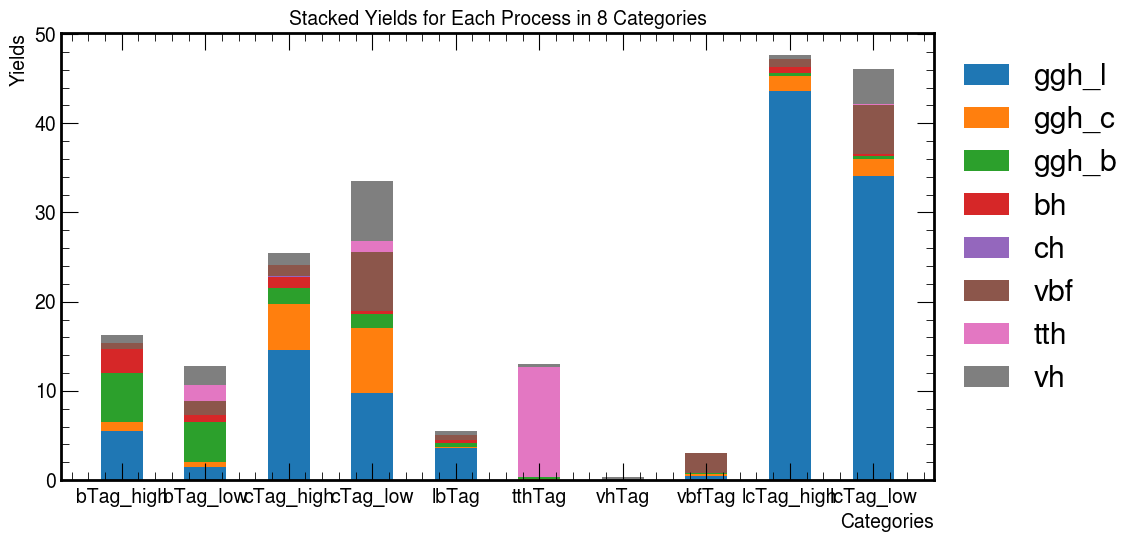

<Figure size 1000x1000 with 0 Axes>

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Number of categories, processes, and yields
n_categories = len([*cats])
n_processes = 6
n_yields = 3


# Category labels
categories = [*cats]
samples_ = ["ggh", "bh", "ch", "vbf", "tth", "vh"]

# X positions for the categories
x = np.arange(n_categories)

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Initialize the bottom values for each category (to stack yields)
bottoms = np.zeros(n_categories)
tot_categories = np.zeros(n_categories)

# Loop over the processes and create stacked bars for each category
for proc in samples_:
    # Stack the 3 yields for each process
    if proc == "ggh":
        for flavour in ["l", "c", "b"]:
            sum_ = []
            for cat in cats:
                if ("lc" in cat):
                    sum_.append(yields[f"{proc}_M125_2017_{flavour}"][cat]/10)
                else:
                    sum_.append(yields[f"{proc}_M125_2017_{flavour}"][cat])
            ax.bar(
                x,                      # Same x positions for all processes
                sum_,                    # Sum of yields for the current process
                width=0.5,               # Bar width for better visibility
                bottom=bottoms,          # Start from the accumulated yields
                label=f"{proc}_{flavour}"               # Label for each process
            )
            # Update bottoms for stacking
            bottoms += sum_
    else:
        sum_ = []
        for cat in cats:
            if ("lc" in cat):
                sum_.append(yields_proc[proc][cat]/10)
            else:
                sum_.append(yields_proc[proc][cat])
        ax.bar(
            x,                      # Same x positions for all processes
            sum_,                    # Sum of yields for the current process
            width=0.5,               # Bar width for better visibility
            bottom=bottoms,          # Start from the accumulated yields
            label=proc               # Label for each process
        )
        # Update bottoms for stacking
        bottoms += sum_

# Add category labels
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=14)

# Add labels and title
ax.set_xlabel('Categories', fontsize=14)
ax.set_ylabel('Yields', fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_title('Stacked Yields for Each Process in 8 Categories', fontsize=14)

# ax.set_yscale('log')

# Create a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()
plt.savefig(f"yields_{ext}.png")


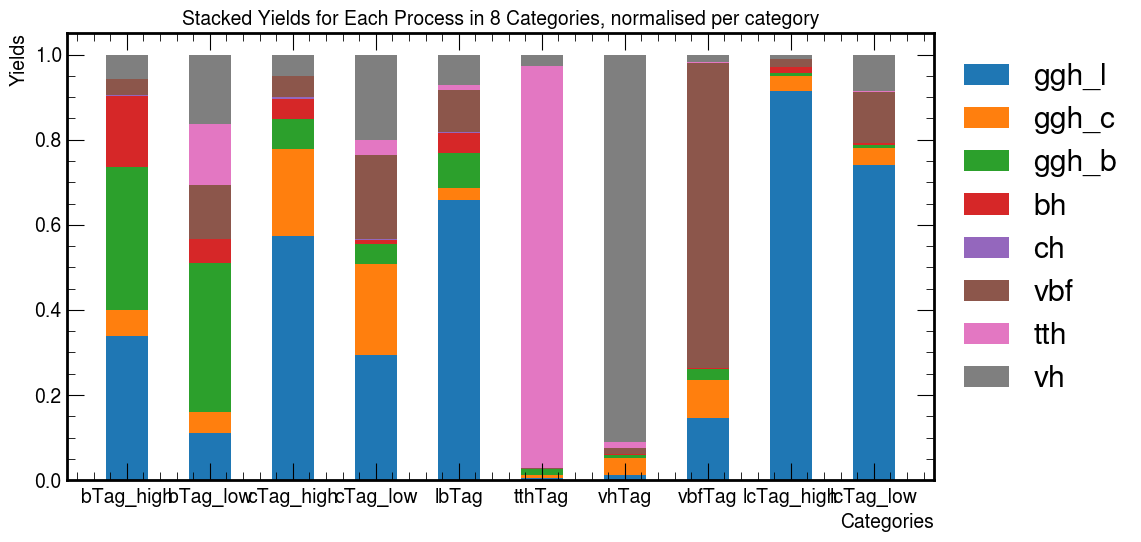

<Figure size 1000x1000 with 0 Axes>

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Number of categories, processes, and yields
n_categories = len([*cats])
n_processes = 6
n_yields = 3


# Category labels
categories = [*cats]
samples_ = ["ggh", "bh", "ch", "vbf", "tth", "vh"]

# X positions for the categories
x = np.arange(n_categories)

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Initialize the bottom values for each category (to stack yields)
bottoms = np.zeros(n_categories)
tot_categories = np.zeros(n_categories)

# Loop over the processes and create stacked bars for each category
for proc in samples_:
    # Stack the 3 yields for each process
    if proc == "ggh":
        for flavour in ["l", "c", "b"]:
            sum_ = []
            for cat in cats:
                sum_.append(yields[f"{proc}_M125_2017_{flavour}"][cat]/yields_cats[cat])
            ax.bar(
                x,                      # Same x positions for all processes
                sum_,                    # Sum of yields for the current process
                width=0.5,               # Bar width for better visibility
                bottom=bottoms,          # Start from the accumulated yields
                label=f"{proc}_{flavour}"               # Label for each process
            )
            # Update bottoms for stacking
            bottoms += sum_
    else:
        sum_ = []
        for cat in cats:
            sum_.append(yields_proc[proc][cat]/yields_cats[cat])
        ax.bar(
            x,                      # Same x positions for all processes
            sum_,                    # Sum of yields for the current process
            width=0.5,               # Bar width for better visibility
            bottom=bottoms,          # Start from the accumulated yields
            label=proc               # Label for each process
        )
        # Update bottoms for stacking
        bottoms += sum_

# Add category labels
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=14)

# Add labels and title
ax.set_xlabel('Categories', fontsize=14)
ax.set_ylabel('Yields', fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_title('Stacked Yields for Each Process in 8 Categories, normalised per category', fontsize=14)

# ax.set_yscale('log')

# Create a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()
plt.savefig(f"yields_norm_cats_{ext}.png")


[0 1 2 3 4 5 6 7 8 9]
[-0.4, 0.6, 1.6, 2.6, 3.6, 4.6, 5.6, 6.6, 7.6, 8.6]


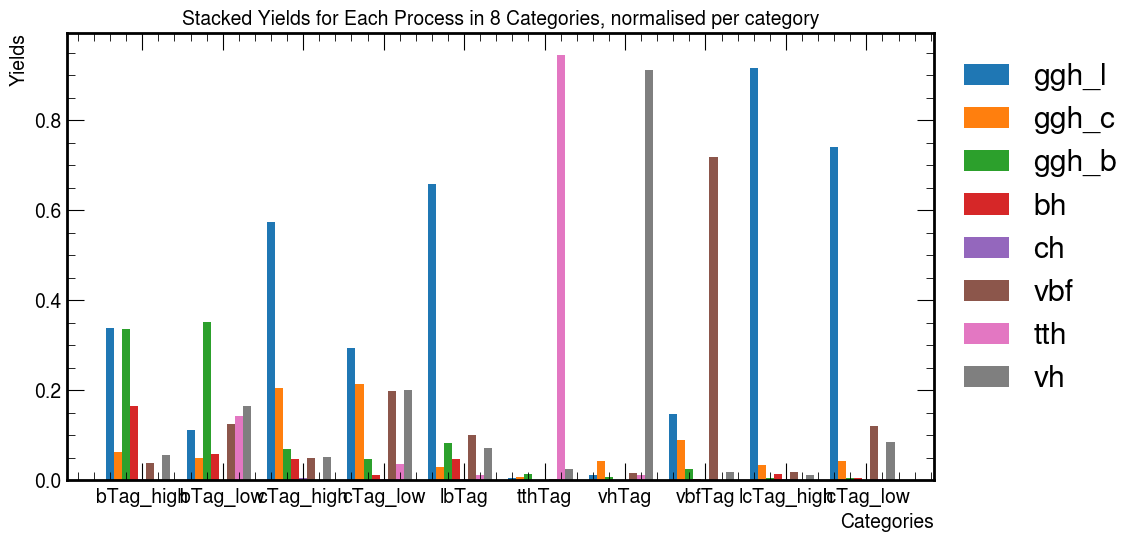

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Number of categories, processes, and yields
n_categories = len([*cats])
n_processes = 8
n_yields = 3


# Category labels
categories = [*cats]
samples_ = ["ggh", "bh", "ch", "vbf", "tth", "vh"]

# X positions for the categories
x = np.arange(n_categories)

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Initialize the bottom values for each category (to stack yields)
bottoms = np.zeros(n_categories)
tot_categories = np.zeros(n_categories)

i = 0
bar_width = 1 / (n_processes + 2)
x_ticks = np.arange(n_categories)
print (x)
x = x_ticks - ak.ones_like(x) * bar_width * int(n_processes / 2)
print (x)
# Loop over the processes and create stacked bars for each category
for proc in samples_:
    # Stack the 3 yields for each process
    if proc == "ggh":
        for flavour in ["l", "c", "b"]:
            sum_ = []
            for cat in cats:
                sum_.append(yields[f"{proc}_M125_2017_{flavour}"][cat]/yields_cats[cat])
            ax.bar(
                x + i * bar_width,             # Same x positions for all processes
                sum_,                          # Sum of yields for the current process
                width=bar_width,               # Bar width for better visibility
                label=f"{proc}_{flavour}"      # Label for each process
            )
            i += 1
    else:
        sum_ = []
        for cat in cats:
            sum_.append(yields_proc[proc][cat]/yields_cats[cat])
        ax.bar(
            x + i * bar_width,             # Same x positions for all processes
            sum_,                          # Sum of yields for the current process
            width=bar_width,               # Bar width for better visibility
            label=f"{proc}"                  # Label for each process
        )
        i += 1

# Add category labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(categories, fontsize=14)

# Add labels and title
ax.set_xlabel('Categories', fontsize=14)
ax.set_ylabel('Yields', fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_title('Stacked Yields for Each Process in 8 Categories, normalised per category', fontsize=14)

# ax.set_yscale('log')

# Create a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()


[0 1 2 3 4 5 6 7 8 9]
[-0.4, 0.6, 1.6, 2.6, 3.6, 4.6, 5.6, 6.6, 7.6, 8.6]


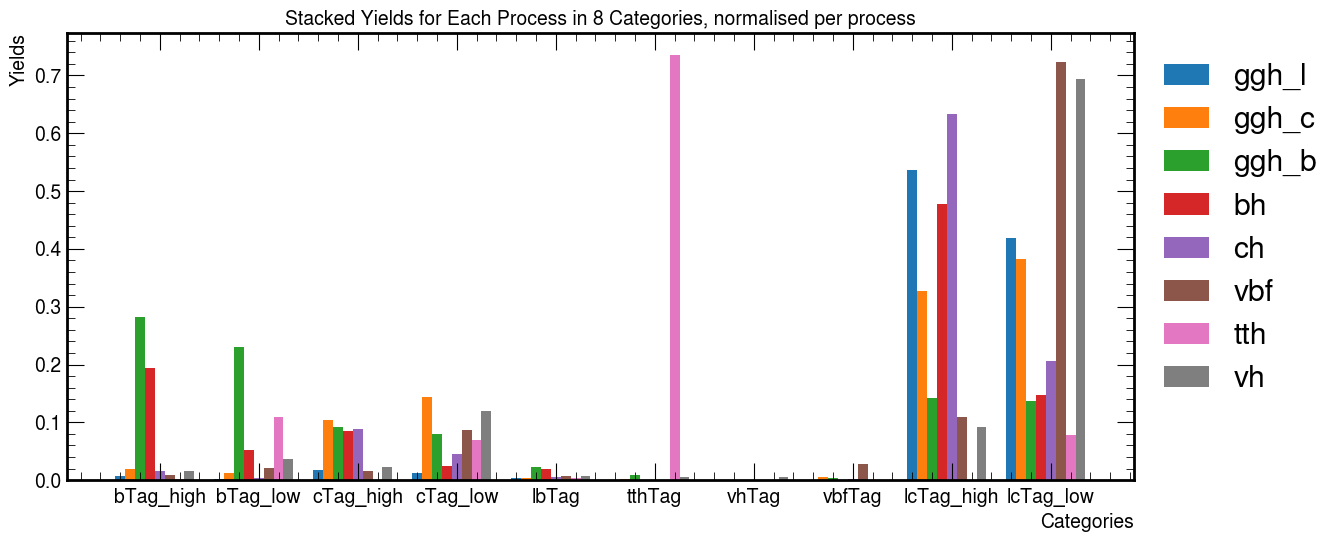

<Figure size 1000x1000 with 0 Axes>

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Number of categories, processes, and yields
n_categories = len([*cats])
n_processes = 8
n_yields = 3


# Category labels
categories = [*cats]
samples_ = ["ggh", "bh", "ch", "vbf", "tth", "vh"]

# X positions for the categories
x = np.arange(n_categories)

# Initialize the plot
fig, ax = plt.subplots(figsize=(14, 6))

# Initialize the bottom values for each category (to stack yields)
bottoms = np.zeros(n_categories)
tot_categories = np.zeros(n_categories)

i = 0
bar_width = 1 / (n_processes + 2)
x_ticks = np.arange(n_categories)
print (x)
x = x_ticks - ak.ones_like(x) * bar_width * int(n_processes / 2)
print (x)
# Loop over the processes and create stacked bars for each category
for proc in samples_:
    # Stack the 3 yields for each process
    if proc == "ggh":
        for flavour in ["l", "c", "b"]:
            sum_ = []
            for cat in cats:
                sum_.append(yields[f"{proc}_M125_2017_{flavour}"][cat]/yields[f"{proc}_M125_2017_{flavour}"]["tot"])
            ax.bar(
                x + i * bar_width,             # Same x positions for all processes
                sum_,                          # Sum of yields for the current process
                width=bar_width,               # Bar width for better visibility
                label=f"{proc}_{flavour}"      # Label for each process
            )
            i += 1
    else:
        sum_ = []
        for cat in cats:
            sum_.append(yields_proc[proc][cat]/yields_proc[proc]["tot"])
        ax.bar(
            x + i * bar_width,             # Same x positions for all processes
            sum_,                          # Sum of yields for the current process
            width=bar_width,               # Bar width for better visibility
            label=f"{proc}"                  # Label for each process
        )
        i += 1

# Add category labels
ax.set_xticks(x_ticks)
ax.set_xticklabels(categories, fontsize=14)

# Add labels and title
ax.set_xlabel('Categories', fontsize=14)
ax.set_ylabel('Yields', fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_title('Stacked Yields for Each Process in 8 Categories, normalised per process', fontsize=14)

# ax.set_yscale('log')

# Create a legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()
plt.savefig(f"yields_norm_proc_{ext}.png")

In [19]:
h = hist.NamedHist(
    hist.axis.Regular(
        44, 0, 1.1, name="CB", label="cH vs CB score", underflow=False, overflow=False
    ),
    hist.axis.Regular(
        44, 0, 1.1, name="GGH", label="cH vs ggH score", underflow=False, overflow=False
    ),
)
# full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
for sample in [*fileset]:
    if sample not in ["bh", "ch", "vbf", "tth", "vh",  "ggh"]:
        h.fill(CB=fileset[sample]["bdt_score"], GGH=fileset[sample]["ch_vs_ggh_bdt_v2_score"], weight=fileset[sample]["weight_norm"])
        print(f"correlation score {sample}", np.corrcoef(fileset[sample]["bdt_score"],fileset[sample]["ch_vs_ggh_bdt_v2_score"]))
# plot2d full
h.plot2d_full(
    main_cmap="cividis",
    top_ls="--",
    top_color="orange",
    top_lw=2,
    side_ls=":",
    side_lw=2,
    side_color="steelblue",
)
plt.show()

print("correlation score ggh", np.corrcoef(fileset["ggh"]["bdt_score"],fileset["ggh"]["ch_vs_ggh_bdt_v2_score"]))


KeyError: 'bdt_score'

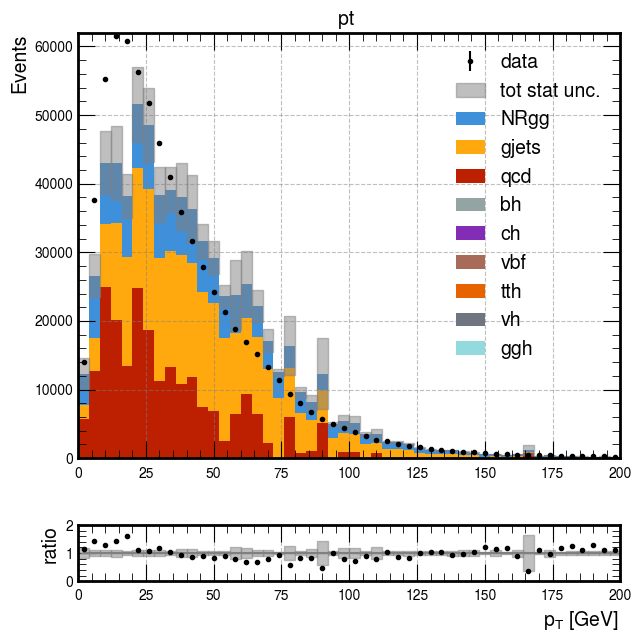

In [ ]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "pt"
min_ = 0.
max_ = 200
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

title = "" 
for x in var.split("_"):     
    title += f"{x} "
sum = 0.
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="tot")

data_hist.fill(ax = fileset_data["data"][var][mask_data], weight = ak.ones_like(fileset_data["data"][var][mask_data]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax0.set_ylim([0.,max(tot["bins"]["tot"])*1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('$p_T$ [GeV] ', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

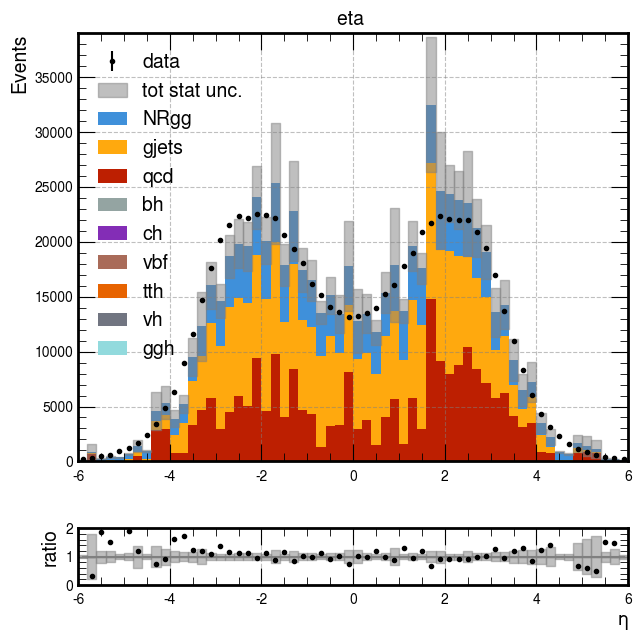

In [21]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "eta"
min_ = -6.
max_ = 6
nbins = 60

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

title = "" 
for x in var.split("_"):     
    title += f"{x} "
sum = 0.
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="tot")

data_hist.fill(ax = fileset_data["data"][var][mask_data], weight = ak.ones_like(fileset_data["data"][var][mask_data]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax0.set_ylim([0.,max(tot["bins"]["tot"])*1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('$\eta$', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

/tmp/ipykernel_31944/4175951683.py:155: RuntimeWarning: invalid value encountered in divide
  data["bins"]["data"] / tot["bins"]["tot"],
/tmp/ipykernel_31944/4175951683.py:159: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
/tmp/ipykernel_31944/4175951683.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")


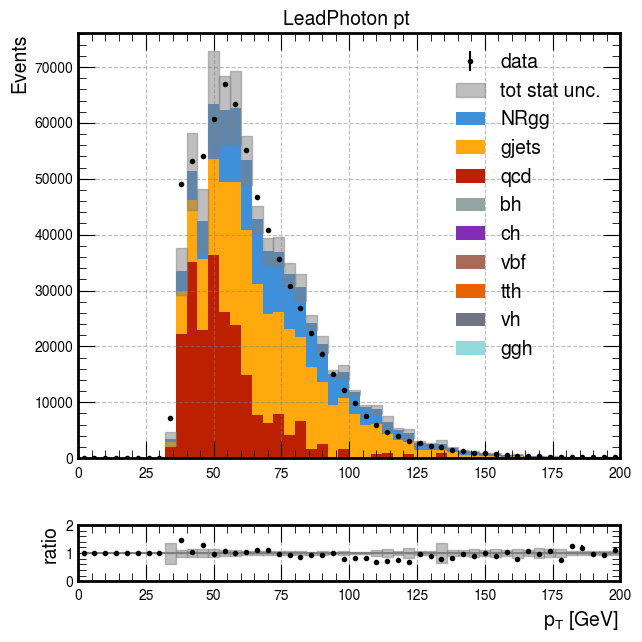

In [22]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "LeadPhoton_pt"
min_ = 0.
max_ = 200
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

title = "" 
for x in var.split("_"):     
    title += f"{x} "
sum = 0.
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="tot")

data_hist.fill(ax = fileset_data["data"][var][mask_data], weight = ak.ones_like(fileset_data["data"][var][mask_data]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax0.set_ylim([0.,max(tot["bins"]["tot"])*1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('$p_T$ [GeV] ', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

/tmp/ipykernel_31944/58182498.py:155: RuntimeWarning: invalid value encountered in divide
  data["bins"]["data"] / tot["bins"]["tot"],
/tmp/ipykernel_31944/58182498.py:159: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
/tmp/ipykernel_31944/58182498.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")


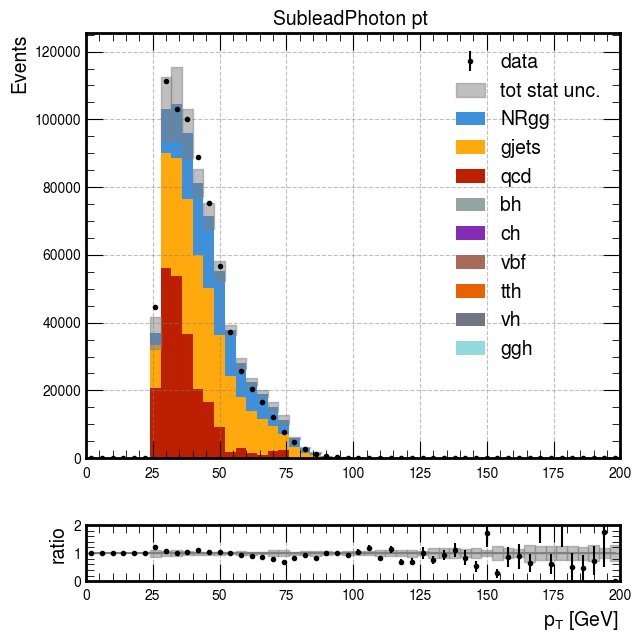

In [23]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "SubleadPhoton_pt"
min_ = 0.
max_ = 200
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

title = "" 
for x in var.split("_"):     
    title += f"{x} "
sum = 0.
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="tot")

data_hist.fill(ax = fileset_data["data"][var][mask_data], weight = ak.ones_like(fileset_data["data"][var][mask_data]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax0.set_ylim([0.,max(tot["bins"]["tot"])*1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('$p_T$ [GeV] ', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

/tmp/ipykernel_31944/2329370407.py:155: RuntimeWarning: invalid value encountered in divide
  data["bins"]["data"] / tot["bins"]["tot"],
/tmp/ipykernel_31944/2329370407.py:159: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
/tmp/ipykernel_31944/2329370407.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")


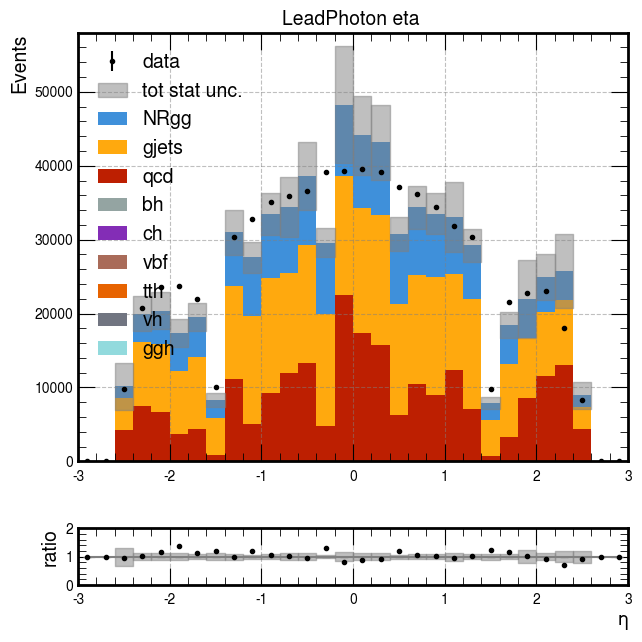

In [24]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "LeadPhoton_eta"
min_ = -3.
max_ = 3
nbins = 30

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

title = "" 
for x in var.split("_"):     
    title += f"{x} "
sum = 0.
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="tot")

data_hist.fill(ax = fileset_data["data"][var][mask_data], weight = ak.ones_like(fileset_data["data"][var][mask_data]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax0.set_ylim([0.,max(tot["bins"]["tot"])*1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('$\eta$', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

/tmp/ipykernel_31944/2415954749.py:155: RuntimeWarning: invalid value encountered in divide
  data["bins"]["data"] / tot["bins"]["tot"],
/tmp/ipykernel_31944/2415954749.py:159: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
/tmp/ipykernel_31944/2415954749.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")


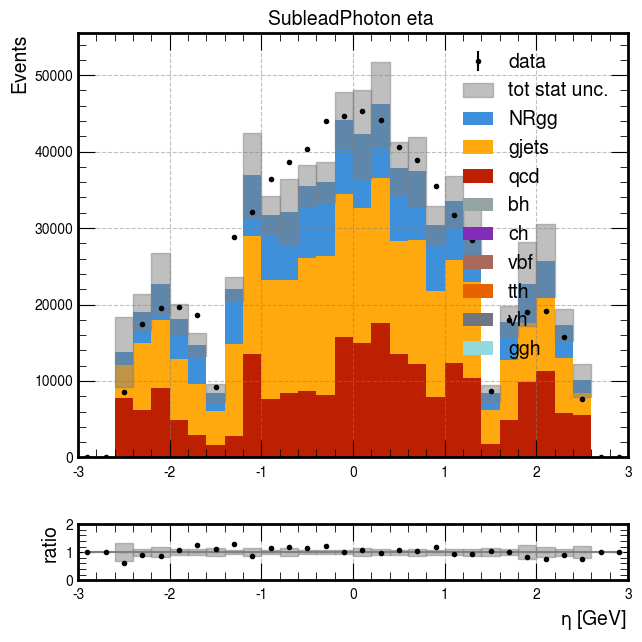

In [25]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "SubleadPhoton_eta"
min_ = -3.
max_ = 3
nbins = 30

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

title = "" 
for x in var.split("_"):     
    title += f"{x} "
sum = 0.
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="tot")

data_hist.fill(ax = fileset_data["data"][var][mask_data], weight = ak.ones_like(fileset_data["data"][var][mask_data]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax0.set_ylim([0.,max(tot["bins"]["tot"])*1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('$\eta$ [GeV] ', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

/tmp/ipykernel_31944/204676619.py:155: RuntimeWarning: invalid value encountered in divide
  data["bins"]["data"] / tot["bins"]["tot"],
/tmp/ipykernel_31944/204676619.py:159: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
/tmp/ipykernel_31944/204676619.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")


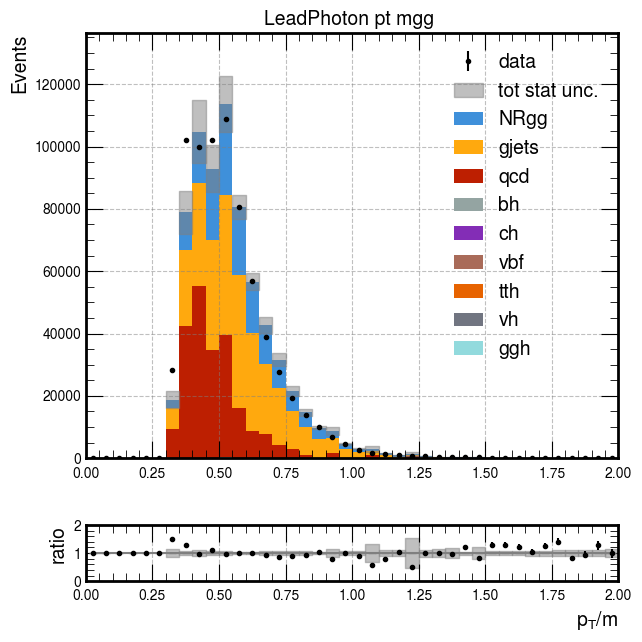

In [26]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "LeadPhoton_pt_mgg"
min_ = 0.
max_ = 2
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

title = "" 
for x in var.split("_"):     
    title += f"{x} "
sum = 0.
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="tot")

data_hist.fill(ax = fileset_data["data"][var][mask_data], weight = ak.ones_like(fileset_data["data"][var][mask_data]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax0.set_ylim([0.,max(tot["bins"]["tot"])*1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('$p_T/m$', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

/tmp/ipykernel_31944/3121236358.py:155: RuntimeWarning: invalid value encountered in divide
  data["bins"]["data"] / tot["bins"]["tot"],
/tmp/ipykernel_31944/3121236358.py:159: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
/tmp/ipykernel_31944/3121236358.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")


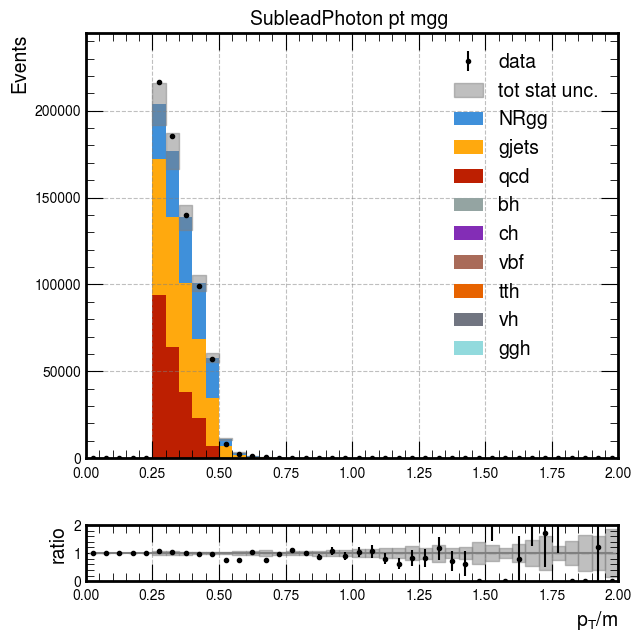

In [27]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "SubleadPhoton_pt_mgg"
min_ = 0.
max_ = 2
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

title = "" 
for x in var.split("_"):     
    title += f"{x} "
sum = 0.
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="tot")

data_hist.fill(ax = fileset_data["data"][var][mask_data], weight = ak.ones_like(fileset_data["data"][var][mask_data]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax0.set_ylim([0.,max(tot["bins"]["tot"])*1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('$p_T/m$', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

/tmp/ipykernel_31944/2156988445.py:155: RuntimeWarning: invalid value encountered in divide
  data["bins"]["data"] / tot["bins"]["tot"],
/tmp/ipykernel_31944/2156988445.py:159: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
/tmp/ipykernel_31944/2156988445.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")


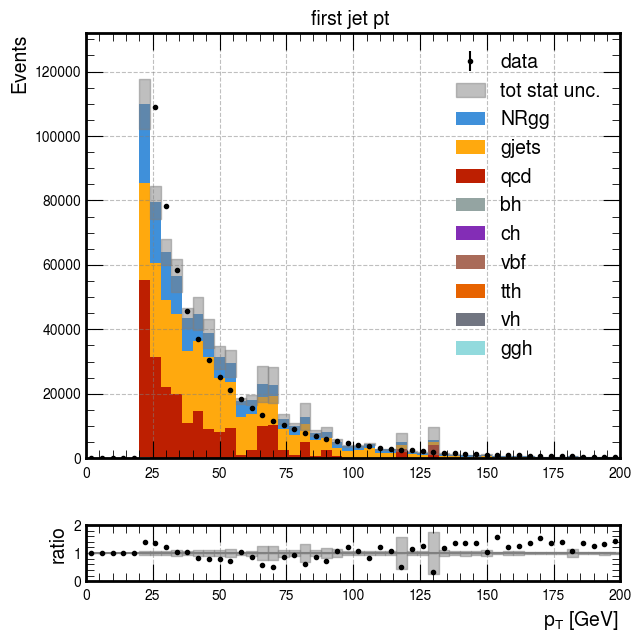

In [28]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "first_jet_pt"
min_ = 0.
max_ = 200
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

title = "" 
for x in var.split("_"):     
    title += f"{x} "
sum = 0.
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="tot")

data_hist.fill(ax = fileset_data["data"][var][mask_data], weight = ak.ones_like(fileset_data["data"][var][mask_data]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax0.set_ylim([0.,max(tot["bins"]["tot"])*1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('$p_T$ [GeV] ', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

/tmp/ipykernel_31944/711027336.py:155: RuntimeWarning: invalid value encountered in divide
  data["bins"]["data"] / tot["bins"]["tot"],
/tmp/ipykernel_31944/711027336.py:159: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
/tmp/ipykernel_31944/711027336.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")


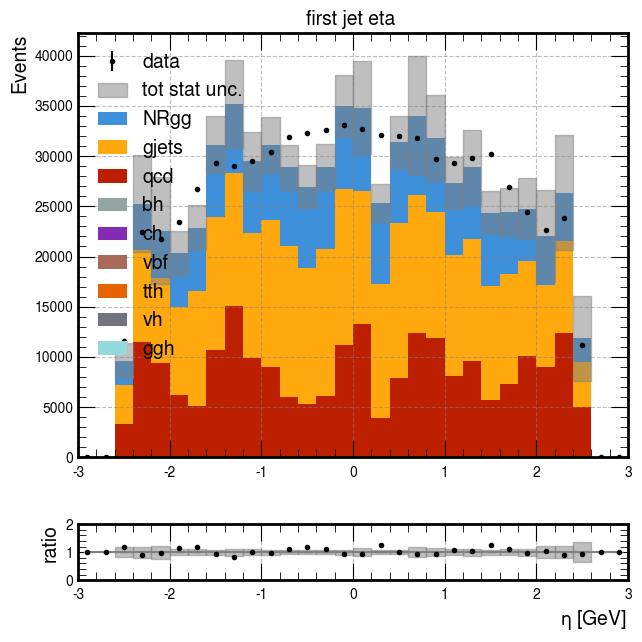

In [29]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "first_jet_eta"
min_ = -3.
max_ = 3
nbins = 30

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

title = "" 
for x in var.split("_"):     
    title += f"{x} "
sum = 0.
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="tot")

data_hist.fill(ax = fileset_data["data"][var][mask_data], weight = ak.ones_like(fileset_data["data"][var][mask_data]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax0.set_ylim([0.,max(tot["bins"]["tot"])*1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('$\eta$ [GeV] ', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

/tmp/ipykernel_31944/4294134693.py:155: RuntimeWarning: invalid value encountered in divide
  data["bins"]["data"] / tot["bins"]["tot"],
/tmp/ipykernel_31944/4294134693.py:159: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
/tmp/ipykernel_31944/4294134693.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")


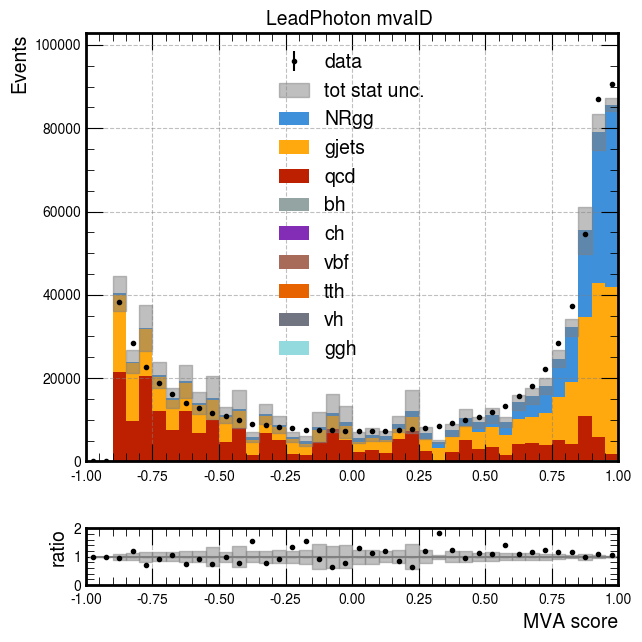

In [30]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "LeadPhoton_mvaID"
min_ = -1.
max_ = 1
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

title = "" 
for x in var.split("_"):     
    title += f"{x} "
sum = 0.
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="tot")

data_hist.fill(ax = fileset_data["data"][var][mask_data], weight = ak.ones_like(fileset_data["data"][var][mask_data]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax0.set_ylim([0.,max(tot["bins"]["tot"])*1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('MVA score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

/tmp/ipykernel_31944/3705078544.py:155: RuntimeWarning: invalid value encountered in divide
  data["bins"]["data"] / tot["bins"]["tot"],
/tmp/ipykernel_31944/3705078544.py:159: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
/tmp/ipykernel_31944/3705078544.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")


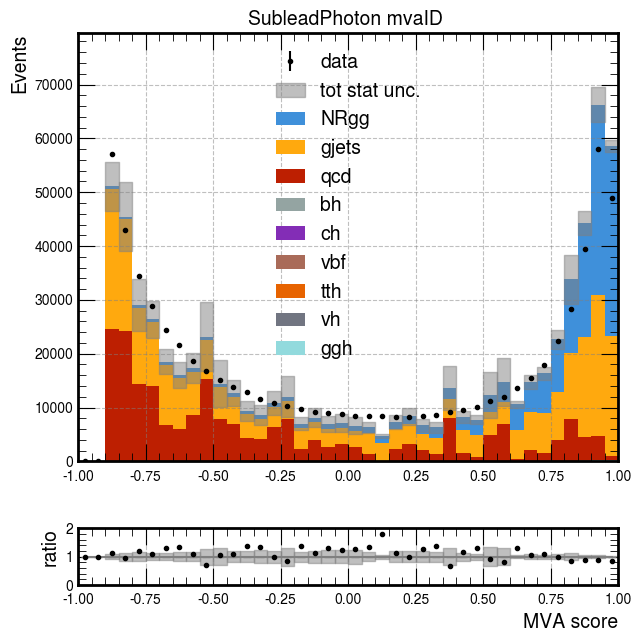

In [31]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "SubleadPhoton_mvaID"
min_ = -1.
max_ = 1
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

title = "" 
for x in var.split("_"):     
    title += f"{x} "
sum = 0.
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="tot")

data_hist.fill(ax = fileset_data["data"][var][mask_data], weight = ak.ones_like(fileset_data["data"][var][mask_data]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax0.set_ylim([0.,max(tot["bins"]["tot"])*1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('MVA score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

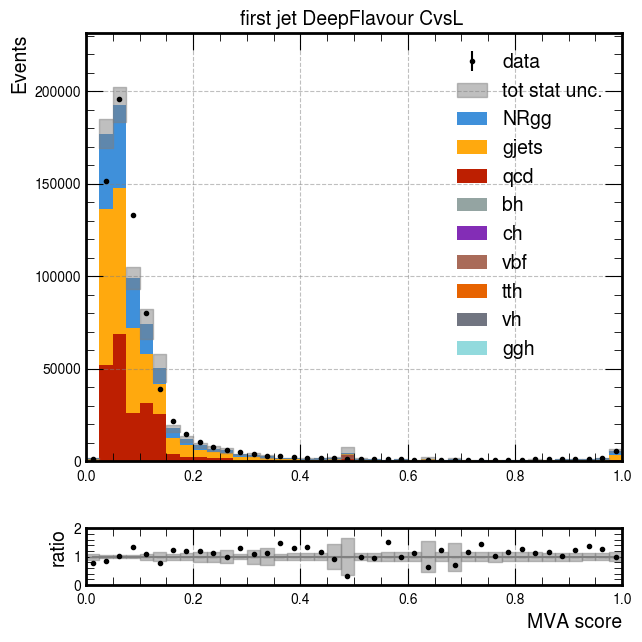

In [32]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "first_jet_DeepFlavour_CvsL"
min_ = 0.
max_ = 1
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

title = "" 
for x in var.split("_"):     
    title += f"{x} "
sum = 0.
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="tot")

data_hist.fill(ax = fileset_data["data"][var][mask_data], weight = ak.ones_like(fileset_data["data"][var][mask_data]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax0.set_ylim([0.,max(tot["bins"]["tot"])*1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('MVA score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

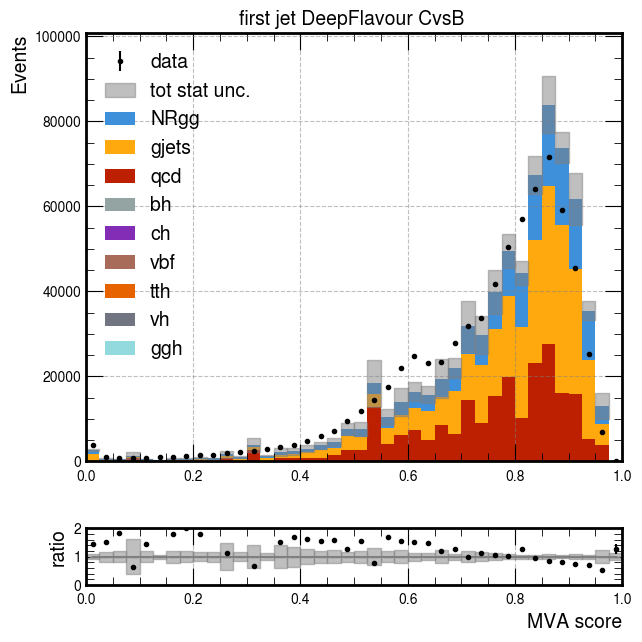

In [33]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "first_jet_DeepFlavour_CvsB"
min_ = 0.
max_ = 1
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

title = "" 
for x in var.split("_"):     
    title += f"{x} "
sum = 0.
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="tot")

data_hist.fill(ax = fileset_data["data"][var][mask_data], weight = ak.ones_like(fileset_data["data"][var][mask_data]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax0.set_ylim([0.,max(tot["bins"]["tot"])*1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('MVA score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

/tmp/ipykernel_31944/3131293452.py:155: RuntimeWarning: invalid value encountered in divide
  data["bins"]["data"] / tot["bins"]["tot"],
/tmp/ipykernel_31944/3131293452.py:159: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
/tmp/ipykernel_31944/3131293452.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")


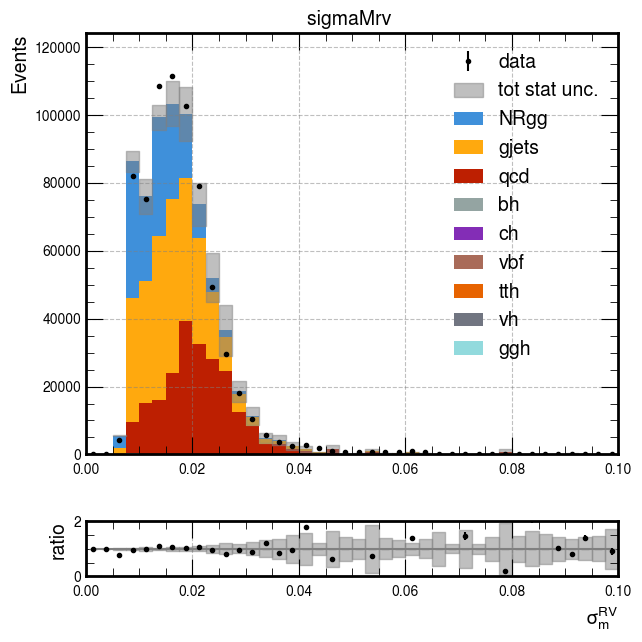

In [34]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "sigmaMrv"
min_ = 0.
max_ = 0.1
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

title = "" 
for x in var.split("_"):     
    title += f"{x} "
sum = 0.
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="tot")

data_hist.fill(ax = fileset_data["data"][var][mask_data], weight = ak.ones_like(fileset_data["data"][var][mask_data]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax0.set_ylim([0.,max(tot["bins"]["tot"])*1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
ax1.set_xlabel('$\sigma_m^{RV}$', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

/tmp/ipykernel_31944/206592507.py:155: RuntimeWarning: invalid value encountered in divide
  data["bins"]["data"] / tot["bins"]["tot"],
/tmp/ipykernel_31944/206592507.py:159: RuntimeWarning: invalid value encountered in divide
  ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
/tmp/ipykernel_31944/206592507.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")


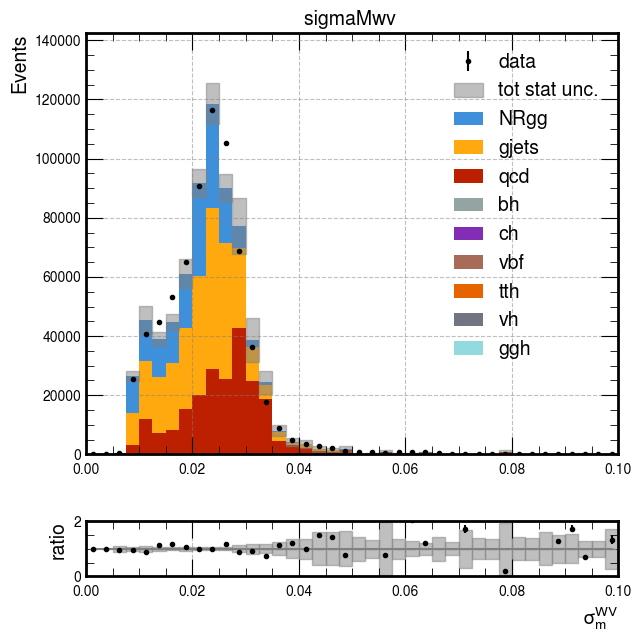

In [35]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "sigmaMwv"
min_ = 0.
max_ = 0.1
nbins = 40

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

title = "" 
for x in var.split("_"):     
    title += f"{x} "
sum = 0.
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="tot")

data_hist.fill(ax = fileset_data["data"][var][mask_data], weight = ak.ones_like(fileset_data["data"][var][mask_data]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax0.set_ylim([0.,max(tot["bins"]["tot"])*1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
ax1.set_xlabel('$\sigma_m^{WV}$', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

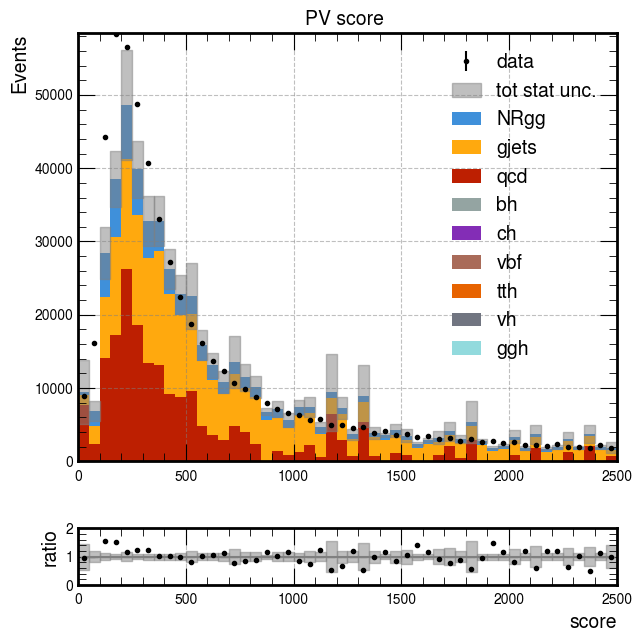

In [36]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "PV_score"
min_ = 0.
max_ = 2500
nbins = 50

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

title = "" 
for x in var.split("_"):     
    title += f"{x} "
sum = 0.
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="tot")

data_hist.fill(ax = fileset_data["data"][var][mask_data], weight = ak.ones_like(fileset_data["data"][var][mask_data]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax0.set_ylim([0.,max(tot["bins"]["tot"])*1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('score', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

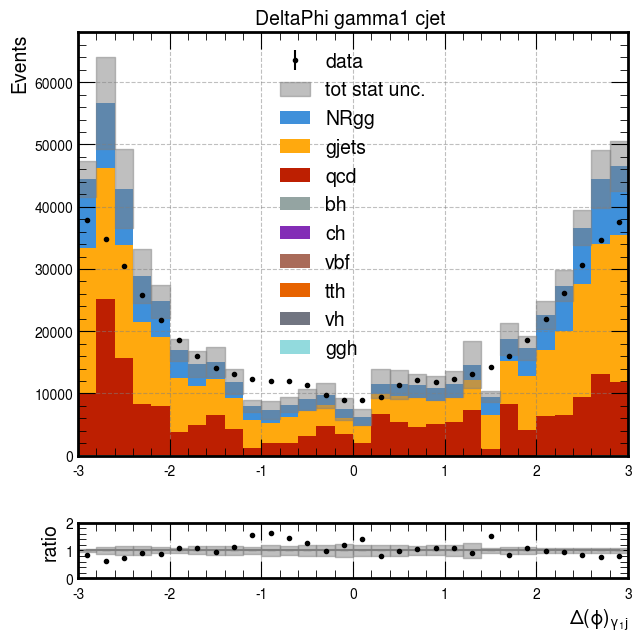

In [37]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "DeltaPhi_gamma1_cjet"
min_ = -3.
max_ = 3.
nbins = 30

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

title = "" 
for x in var.split("_"):     
    title += f"{x} "
sum = 0.
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="tot")

data_hist.fill(ax = fileset_data["data"][var][mask_data], weight = ak.ones_like(fileset_data["data"][var][mask_data]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {} 
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax0.set_ylim([0.,max(tot["bins"]["tot"])*1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
ax1.set_xlabel('$\Delta(\phi)_{\gamma_1j}$', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

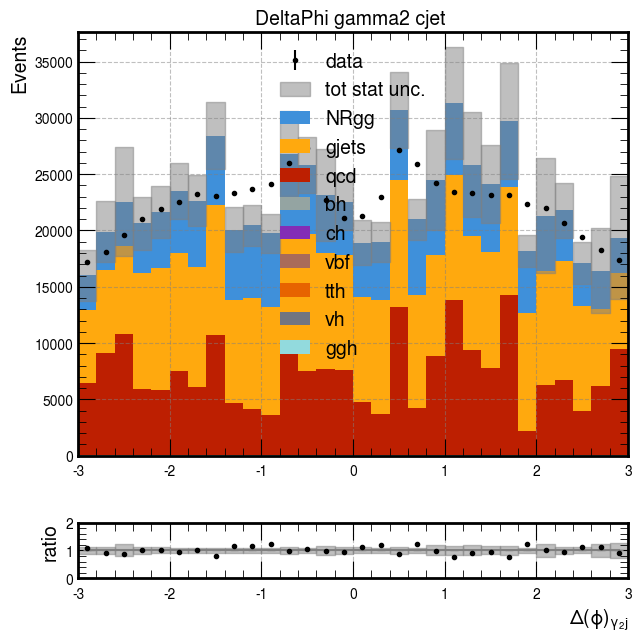

In [38]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "DeltaPhi_gamma2_cjet"
min_ = -3.
max_ = 3.
nbins = 30

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

title = "" 
for x in var.split("_"):     
    title += f"{x} "
sum = 0.
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="tot")

data_hist.fill(ax = fileset_data["data"][var][mask_data], weight = ak.ones_like(fileset_data["data"][var][mask_data]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax0.set_ylim([0.,max(tot["bins"]["tot"])*1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
ax1.set_xlabel('$\Delta(\phi)_{\gamma_2j}$', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

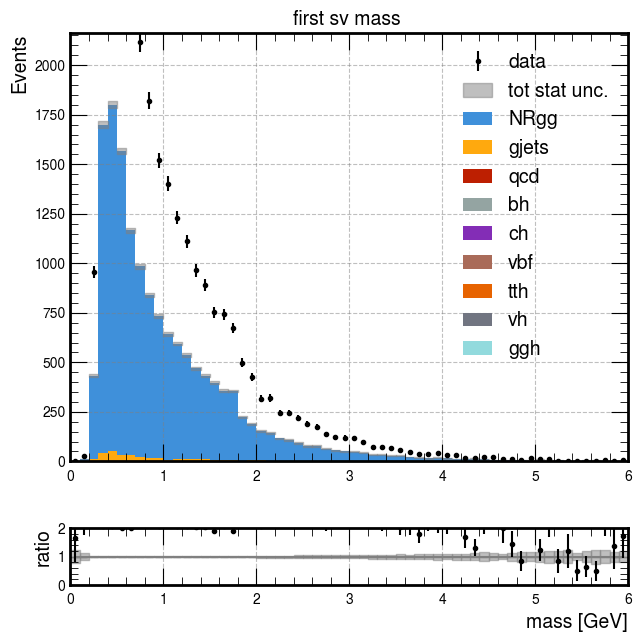

In [39]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "first_sv_mass"
min_ = 0.
max_ = 6.
nbins = 60

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

title = "" 
for x in var.split("_"):     
    title += f"{x} "
sum = 0.
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["weight_norm"][mask_MC[sample]], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c="tot")

data_hist.fill(ax = fileset_data["data"][var][mask_data], weight = ak.ones_like(fileset_data["data"][var][mask_data]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color="black", marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax0.set_ylim([0.,max(tot["bins"]["tot"])*1.2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
ax1.set_xlabel('mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

In [81]:
categories_1 = {
    "boundaries": {
        "CvsL": [0.25, 1.],
        "cH_vs_ggH": [0., 1.],
        "cH_vs_cb": [0., 1.]
    },
    "n_att": {
        "cH_vs_ggH": 20,
        "cH_vs_cb": 20
    },
    "n_cat": {
        "cH_vs_ggH": 2,
        "cH_vs_cb": 2
    },
    "samples": {
        "sig": ["ch"],
        "bkg": ["ggh", "vh", "tth", "vbf", "bh", "gjets-600", "gjets-400To600", "gjets-200To400", "gjets-100To200", "gjets-40To100", "ggNR_low_mass", "ggNR_high_mass", "qcd_high_mgg_high_pt", "qcd_high_mgg_low_pt", "qcd_low_mgg"],
        "res_bkg": ["ggh", "vh", "tth", "vbf", "bh"],
        "nonres_bkg": ["gjets-600", "gjets-400To600", "gjets-200To400", "gjets-100To200", "gjets-40To100", "ggNR_low_mass", "ggNR_high_mass", "qcd_high_mgg_high_pt", "qcd_high_mgg_low_pt", "qcd_low_mgg"]
    },
    "significance": {}
}

In [82]:
n_att_cb = categories_1["n_att"]["cH_vs_cb"]
n_att_ggh = categories_1["n_att"]["cH_vs_ggH"]
cat_n = categories_1["n_cat"]["cH_vs_cb"] * categories_1["n_cat"]["cH_vs_ggH"]
for i in range(1, categories_1["n_att"]["cH_vs_cb"]):
    cb_down = categories_1["boundaries"]["cH_vs_cb"][0] + (i * (categories_1["boundaries"]["cH_vs_cb"][1] - categories_1["boundaries"]["cH_vs_cb"][0]) / n_att_cb)
    cb_up = categories_1["boundaries"]["cH_vs_cb"][1]
    for j in range(1, categories_1["n_att"]["cH_vs_ggH"]):
        ggh_down = categories_1["boundaries"]["cH_vs_ggH"][0] + (j * (categories_1["boundaries"]["cH_vs_ggH"][1] - categories_1["boundaries"]["cH_vs_ggH"][0])/ n_att_ggh)
        ggh_up = categories_1["boundaries"]["cH_vs_ggH"][1]

        print("i", i, "j", j)
        print("   - ggh", ggh_down, "cb", cb_down)

        # print("ggh_down", ggh_down, "ggh_up", ggh_up)
        # print("cb_down", cb_down, "cb_up", cb_up)

        bkg = [0. for cat in range(cat_n)]
        bkg_nr = [0. for cat in range(cat_n)]
        bkg_r = [0. for cat in range(cat_n)]
        sig = [0. for cat in range(cat_n)]

        sig_tot = 0.
        bkg_tot = 0.

        for sample in [*fileset]:
            mask_mass = (fileset[sample]["CMS_hgg_mass"] >= 110) & (fileset[sample]["CMS_hgg_mass"] <= 135)
            mask_cb = (fileset[sample]["bdt_score"] >= cb_down) & (fileset[sample]["bdt_score"] <= cb_up)
            mask_ggh = (fileset[sample]["ch_vs_ggh_bdt_v2_score"] >= ggh_down) & (fileset[sample]["ch_vs_ggh_bdt_v2_score"] <= ggh_up)

            if sample in categories_1["samples"]["sig"]:
                sig_tot += ak.sum(fileset[sample]["weight_norm"][mask_mass])

                sig[0] += ak.sum(fileset[sample]["weight_norm"][mask_cb & mask_ggh & mask_mass])
                sig[1] += ak.sum(fileset[sample]["weight_norm"][mask_cb & ~mask_ggh & mask_mass])
                sig[2] += ak.sum(fileset[sample]["weight_norm"][~mask_cb & mask_ggh])
                sig[3] += ak.sum(fileset[sample]["weight_norm"][~mask_cb & ~mask_ggh])

            else:
                bkg_tot += ak.sum(fileset[sample]["weight_norm"][mask_mass])

                bkg[0] += ak.sum(fileset[sample]["weight_norm"][mask_cb & mask_ggh & mask_mass])
                bkg[1] += ak.sum(fileset[sample]["weight_norm"][mask_cb & ~mask_ggh & mask_mass])
                bkg[2] += ak.sum(fileset[sample]["weight_norm"][~mask_cb & mask_ggh & mask_mass])
                bkg[3] += ak.sum(fileset[sample]["weight_norm"][~mask_cb & ~mask_ggh & mask_mass])

                if sample in categories_1["samples"]["nonres_bkg"]:
                    bkg_nr[0] += ak.sum(fileset[sample]["weight_norm"][mask_cb & mask_ggh & mask_mass])
                    bkg_nr[1] += ak.sum(fileset[sample]["weight_norm"][mask_cb & ~mask_ggh & mask_mass])
                    bkg_nr[2] += ak.sum(fileset[sample]["weight_norm"][~mask_cb & mask_ggh & mask_mass])
                    bkg_nr[3] += ak.sum(fileset[sample]["weight_norm"][~mask_cb & ~mask_ggh & mask_mass])
                elif sample in categories_1["samples"]["res_bkg"]:
                    bkg_r[0] += ak.sum(fileset[sample]["weight_norm"][mask_cb & mask_ggh & mask_mass])
                    bkg_r[1] += ak.sum(fileset[sample]["weight_norm"][mask_cb & ~mask_ggh & mask_mass])
                    bkg_r[2] += ak.sum(fileset[sample]["weight_norm"][~mask_cb & mask_ggh & mask_mass])
                    bkg_r[3] += ak.sum(fileset[sample]["weight_norm"][~mask_cb & ~mask_ggh & mask_mass])
        
        categories_1["significance"][f"{i}{j}"] = {
            "sig": (sig[0]/np.sqrt(bkg[0]), sig[1]/np.sqrt(bkg[1]), sig[2]/np.sqrt(bkg[2]), sig[3]/np.sqrt(bkg[3])), 
            "S": (sig[0], sig[1], sig[2], sig[3]), 
            "B": (bkg[0], bkg[1], bkg[2], bkg[3]),
            "B_nr": (bkg_nr[0], bkg_nr[1], bkg_nr[2], bkg_nr[3]), 
            "B_r": (bkg_r[0], bkg_r[1], bkg_r[2], bkg_r[3]),
            "cb_bound": cb_down,
            "ggh_bound": ggh_down,
            "sig_tot": sig_tot,
            "bkg_tot": bkg_tot
        }

i 1 j 1
   - ggh 0.05 cb 0.05
i 1 j 2
   - ggh 0.1 cb 0.05
i 1 j 3
   - ggh 0.15 cb 0.05
i 1 j 4
   - ggh 0.2 cb 0.05
i 1 j 5
   - ggh 0.25 cb 0.05
i 1 j 6
   - ggh 0.3 cb 0.05
i 1 j 7
   - ggh 0.35 cb 0.05
i 1 j 8
   - ggh 0.4 cb 0.05
i 1 j 9
   - ggh 0.45 cb 0.05
i 1 j 10
   - ggh 0.5 cb 0.05
i 1 j 11
   - ggh 0.55 cb 0.05
i 1 j 12
   - ggh 0.6 cb 0.05
i 1 j 13
   - ggh 0.65 cb 0.05
i 1 j 14
   - ggh 0.7 cb 0.05
i 1 j 15
   - ggh 0.75 cb 0.05
i 1 j 16
   - ggh 0.8 cb 0.05
i 1 j 17
   - ggh 0.85 cb 0.05
i 1 j 18
   - ggh 0.9 cb 0.05
i 1 j 19
   - ggh 0.95 cb 0.05
i 2 j 1
   - ggh 0.05 cb 0.1
i 2 j 2
   - ggh 0.1 cb 0.1
i 2 j 3
   - ggh 0.15 cb 0.1
i 2 j 4
   - ggh 0.2 cb 0.1
i 2 j 5
   - ggh 0.25 cb 0.1
i 2 j 6
   - ggh 0.3 cb 0.1
i 2 j 7
   - ggh 0.35 cb 0.1
i 2 j 8
   - ggh 0.4 cb 0.1
i 2 j 9
   - ggh 0.45 cb 0.1
i 2 j 10
   - ggh 0.5 cb 0.1
i 2 j 11
   - ggh 0.55 cb 0.1
i 2 j 12
   - ggh 0.6 cb 0.1
i 2 j 13
   - ggh 0.65 cb 0.1
i 2 j 14
   - ggh 0.7 cb 0.1
i 2 j 15
   - ggh 0.75 cb

In [91]:
tot_1 = []
sig_like_1 = []
bkg_sig_like_1 = []
sig_bkg_like_1 = []
bkg_like_1 = []
bound_cb_1 = []
bound_ggh_1 = []
B = 'B'
for cat in categories_1["significance"]:
    #print(f"{cat}: {categories_1['significance'][cat]['sig']}, bound ggh: {categories_1['significance'][cat]['ggh_bound']}, bound cb: {categories_1['significance'][cat]['cb_bound']}")
    _tot = categories_1['significance'][cat]['S'][0]/np.sqrt(categories_1['significance'][cat][B][0]) + categories_1['significance'][cat]['S'][1]/np.sqrt(categories_1['significance'][cat][B][1]) + categories_1['significance'][cat]['S'][2]/np.sqrt(categories_1['significance'][cat][B][2]) + categories_1['significance'][cat]['S'][3]/np.sqrt(categories_1['significance'][cat][B][3])
    sig_like_1.append(categories_1['significance'][cat]['S'][0]/np.sqrt(categories_1['significance'][cat][B][0]))
    bkg_sig_like_1.append(categories_1['significance'][cat]['S'][1]/np.sqrt(categories_1['significance'][cat][B][0]))
    sig_bkg_like_1.append(categories_1['significance'][cat]['S'][2]/np.sqrt(categories_1['significance'][cat][B][0]))
    bkg_like_1.append(categories_1['significance'][cat]['S'][3]/np.sqrt(categories_1['significance'][cat][B][0]))
    tot_1.append(_tot)
    print("{:4}: {:6.4f}, {:6.4f}, {:6.4f}, {:6.4f}, bound ggh: {:.2f}, bound cb {:.2f}, total sig: {:.4f}, siglike sig: {:.4f}".format(cat, categories_1['significance'][cat]['sig'][0], categories_1['significance'][cat]['sig'][1], categories_1['significance'][cat]['sig'][2], categories_1['significance'][cat]['sig'][3], categories_1['significance'][cat]['ggh_bound'], categories_1['significance'][cat]['cb_bound'], _tot, categories_1['significance'][cat]['S'][0]/np.sqrt(categories_1['significance'][cat][B][0])))
    bound_cb_1.append(categories_1['significance'][cat]['cb_bound']+0.01)
    bound_ggh_1.append(categories_1['significance'][cat]['ggh_bound']+0.01)

11  : 0.0034, 0.0001, 0.0000, 0.0000, bound ggh: 0.05, bound cb 0.05, total sig: 0.0035, siglike sig: 0.0034
12  : 0.0034, 0.0002, 0.0000, 0.0000, bound ggh: 0.10, bound cb 0.05, total sig: 0.0036, siglike sig: 0.0034
13  : 0.0034, 0.0003, 0.0000, 0.0000, bound ggh: 0.15, bound cb 0.05, total sig: 0.0037, siglike sig: 0.0034
14  : 0.0034, 0.0004, 0.0000, 0.0000, bound ggh: 0.20, bound cb 0.05, total sig: 0.0038, siglike sig: 0.0034
15  : 0.0035, 0.0004, 0.0000, 0.0000, bound ggh: 0.25, bound cb 0.05, total sig: 0.0039, siglike sig: 0.0035
16  : 0.0035, 0.0005, 0.0000, 0.0000, bound ggh: 0.30, bound cb 0.05, total sig: 0.0040, siglike sig: 0.0035
17  : 0.0035, 0.0005, 0.0000, 0.0000, bound ggh: 0.35, bound cb 0.05, total sig: 0.0041, siglike sig: 0.0035
18  : 0.0036, 0.0006, 0.0000, 0.0000, bound ggh: 0.40, bound cb 0.05, total sig: 0.0042, siglike sig: 0.0036
19  : 0.0036, 0.0006, 0.0000, 0.0000, bound ggh: 0.45, bound cb 0.05, total sig: 0.0043, siglike sig: 0.0036
110 : 0.0036, 0.000

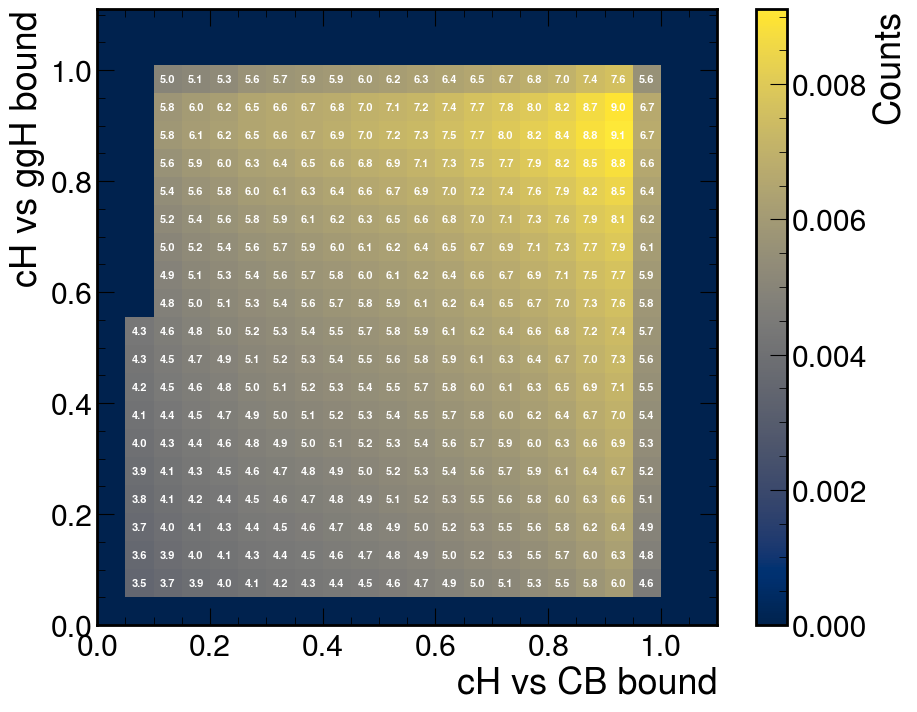

In [92]:
# Define the NamedHist object with the specified axes
h = hist.NamedHist(
    hist.axis.Regular(
        22, 0., 1.1, name="CB", label="cH vs CB bound", underflow=False, overflow=False
    ),
    hist.axis.Regular(
        22, 0., 1.11, name="GGH", label="cH vs ggH bound", underflow=False, overflow=False
    ),
)

# Fill the histogram with cleaned data
h.fill(CB=bound_cb_1, GGH=bound_ggh_1, weight=tot_1)

# Extract bin centers and values
x_centers = h.axes[0].centers
y_centers = h.axes[1].centers
values = h.view()

# Plot the 2D histogram using Matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
pcm = ax.pcolormesh(h.axes[0].edges, h.axes[1].edges, values.T, cmap="cividis")

# Add color bar
plt.colorbar(pcm, ax=ax, label='Counts')

# Annotate each bin with its value
for i, x in enumerate(x_centers):
    for j, y in enumerate(y_centers):
        value = values[i, j]
        if value > 0:  # Only annotate bins with non-zero values
            ax.text(x, y, f'{value*1000:.1f}', ha='center', va='center', color='white', fontsize=8, fontweight='bold')

# Set axis labels
ax.set_xlabel("cH vs CB bound")
ax.set_ylabel("cH vs ggH bound")

# Display the plot
plt.show()

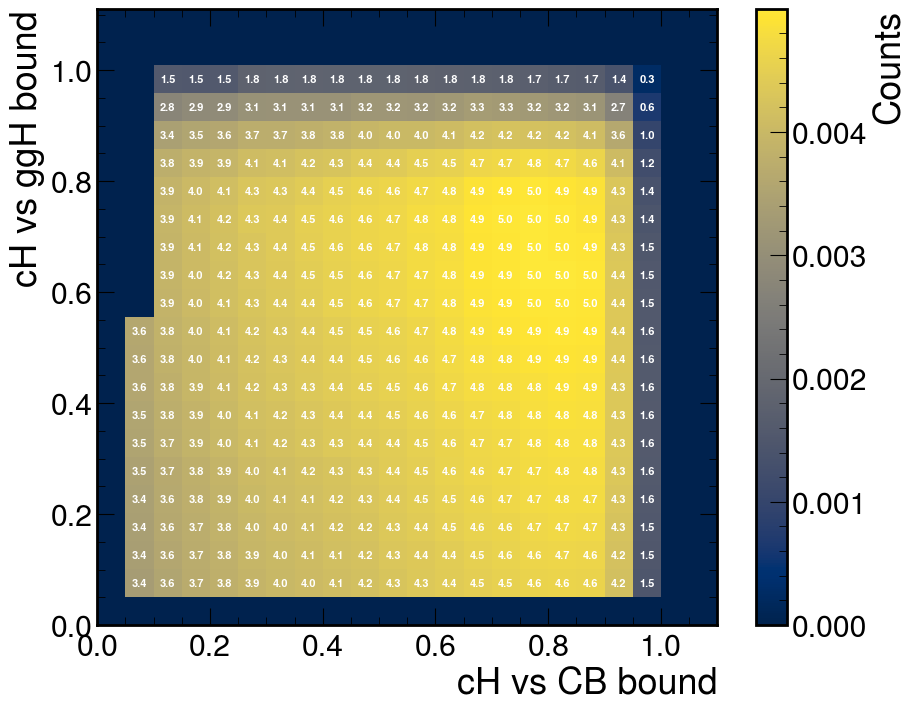

In [95]:
# Define the NamedHist object with the specified axes
h = hist.NamedHist(
    hist.axis.Regular(
        22, 0., 1.1, name="CB", label="cH vs CB bound", underflow=False, overflow=False
    ),
    hist.axis.Regular(
        22, 0., 1.11, name="GGH", label="cH vs ggH bound", underflow=False, overflow=False
    ),
)

# Fill the histogram with cleaned data
h.fill(CB=bound_cb_1, GGH=bound_ggh_1, weight=sig_like_1)

# Extract bin centers and values
x_centers = h.axes[0].centers
y_centers = h.axes[1].centers
values = h.view()

# Plot the 2D histogram using Matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
pcm = ax.pcolormesh(h.axes[0].edges, h.axes[1].edges, values.T, cmap="cividis")

# Add color bar
plt.colorbar(pcm, ax=ax, label='Counts')

# Annotate each bin with its value
for i, x in enumerate(x_centers):
    for j, y in enumerate(y_centers):
        value = values[i, j]
        if value > 0:  # Only annotate bins with non-zero values
            ax.text(x, y, f'{value*1000:.1f}', ha='center', va='center', color='white', fontsize=8, fontweight='bold')

# Set axis labels
ax.set_xlabel("cH vs CB bound")
ax.set_ylabel("cH vs ggH bound")

# Display the plot
plt.show()

# Categorisation

In [40]:
categories = {
    "boundaries": {
        "CvsL": [0.25, 1.],
        "cH_vs_ggH": [0.65, 1.],
        "cH_vs_cb": [0.85, 1.]
    },
    "n_att": {
        "cH_vs_ggH": 35,
        "cH_vs_cb": 15
    },
    "n_cat": {
        "cH_vs_ggH": 2,
        "cH_vs_cb": 2
    },
    "samples": {
        "sig": ["ch"],
        "bkg": ["ggh", "vh", "tth", "vbf", "bh", "gjets-600", "gjets-400To600", "gjets-200To400", "gjets-100To200", "gjets-40To100", "ggNR_low_mass", "ggNR_high_mass", "qcd_high_mgg_high_pt", "qcd_high_mgg_low_pt", "qcd_low_mgg"],
        "res_bkg": ["ggh", "vh", "tth", "vbf", "bh"],
        "nonres_bkg": ["gjets-600", "gjets-400To600", "gjets-200To400", "gjets-100To200", "gjets-40To100", "ggNR_low_mass", "ggNR_high_mass", "qcd_high_mgg_high_pt", "qcd_high_mgg_low_pt", "qcd_low_mgg"]
    },
    "significance": {}
}

In [41]:
n_att_cb = categories["n_att"]["cH_vs_cb"]
n_att_ggh = categories["n_att"]["cH_vs_ggH"]
cat_n = categories["n_cat"]["cH_vs_cb"] * categories["n_cat"]["cH_vs_ggH"]
for i in range(1, categories["n_att"]["cH_vs_cb"]):
    cb_down = categories["boundaries"]["cH_vs_cb"][0] + (i * (categories["boundaries"]["cH_vs_cb"][1] - categories["boundaries"]["cH_vs_cb"][0]) / n_att_cb)
    cb_up = categories["boundaries"]["cH_vs_cb"][1]
    for j in range(1, categories["n_att"]["cH_vs_ggH"]):
        ggh_down = categories["boundaries"]["cH_vs_ggH"][0] + (j * (categories["boundaries"]["cH_vs_ggH"][1] - categories["boundaries"]["cH_vs_ggH"][0])/ n_att_ggh)
        ggh_up = categories["boundaries"]["cH_vs_ggH"][1]

        print("i", i, "j", j)
        print("   - ggh", ggh_down, "cb", cb_down)

        # print("ggh_down", ggh_down, "ggh_up", ggh_up)
        # print("cb_down", cb_down, "cb_up", cb_up)

        bkg = [0. for cat in range(cat_n)]
        bkg_nr = [0. for cat in range(cat_n)]
        bkg_r = [0. for cat in range(cat_n)]
        sig = [0. for cat in range(cat_n)]

        sig_tot = 0.
        bkg_tot = 0.

        for sample in [*fileset]:
            mask_mass = (fileset[sample]["CMS_hgg_mass"] >= 110) & (fileset[sample]["CMS_hgg_mass"] <= 135)
            mask_cb = (fileset[sample]["bdt_score"] >= cb_down) & (fileset[sample]["bdt_score"] <= cb_up)
            mask_ggh = (fileset[sample]["ch_vs_ggh_bdt_v2_score"] >= ggh_down) & (fileset[sample]["ch_vs_ggh_bdt_v2_score"] <= ggh_up)

            if sample in categories["samples"]["sig"]:
                sig_tot += ak.sum(fileset[sample]["weight_norm"][mask_mass])

                sig[0] += ak.sum(fileset[sample]["weight_norm"][mask_cb & mask_ggh & mask_mass])
                sig[1] += ak.sum(fileset[sample]["weight_norm"][mask_cb & ~mask_ggh & mask_mass])
                sig[2] += ak.sum(fileset[sample]["weight_norm"][~mask_cb & mask_ggh])
                sig[3] += ak.sum(fileset[sample]["weight_norm"][~mask_cb & ~mask_ggh])

            else:
                bkg_tot += ak.sum(fileset[sample]["weight_norm"][mask_mass])

                bkg[0] += ak.sum(fileset[sample]["weight_norm"][mask_cb & mask_ggh & mask_mass])
                bkg[1] += ak.sum(fileset[sample]["weight_norm"][mask_cb & ~mask_ggh & mask_mass])
                bkg[2] += ak.sum(fileset[sample]["weight_norm"][~mask_cb & mask_ggh & mask_mass])
                bkg[3] += ak.sum(fileset[sample]["weight_norm"][~mask_cb & ~mask_ggh & mask_mass])

                if sample in categories["samples"]["nonres_bkg"]:
                    bkg_nr[0] += ak.sum(fileset[sample]["weight_norm"][mask_cb & mask_ggh & mask_mass])
                    bkg_nr[1] += ak.sum(fileset[sample]["weight_norm"][mask_cb & ~mask_ggh & mask_mass])
                    bkg_nr[2] += ak.sum(fileset[sample]["weight_norm"][~mask_cb & mask_ggh & mask_mass])
                    bkg_nr[3] += ak.sum(fileset[sample]["weight_norm"][~mask_cb & ~mask_ggh & mask_mass])
                elif sample in categories["samples"]["res_bkg"]:
                    bkg_r[0] += ak.sum(fileset[sample]["weight_norm"][mask_cb & mask_ggh & mask_mass])
                    bkg_r[1] += ak.sum(fileset[sample]["weight_norm"][mask_cb & ~mask_ggh & mask_mass])
                    bkg_r[2] += ak.sum(fileset[sample]["weight_norm"][~mask_cb & mask_ggh & mask_mass])
                    bkg_r[3] += ak.sum(fileset[sample]["weight_norm"][~mask_cb & ~mask_ggh & mask_mass])
        
        categories["significance"][f"{i}{j}"] = {
            "sig": (sig[0]/np.sqrt(bkg[0]), sig[1]/np.sqrt(bkg[1]), sig[2]/np.sqrt(bkg[2]), sig[3]/np.sqrt(bkg[3])), 
            "S": (sig[0], sig[1], sig[2], sig[3]), 
            "B": (bkg[0], bkg[1], bkg[2], bkg[3]),
            "B_nr": (bkg_nr[0], bkg_nr[1], bkg_nr[2], bkg_nr[3]), 
            "B_r": (bkg_r[0], bkg_r[1], bkg_r[2], bkg_r[3]),
            "cb_bound": cb_down,
            "ggh_bound": ggh_down,
            "sig_tot": sig_tot,
            "bkg_tot": bkg_tot
        }
        

i 1 j 1
   - ggh 0.66 cb 0.86
i 1 j 2
   - ggh 0.67 cb 0.86
i 1 j 3
   - ggh 0.68 cb 0.86
i 1 j 4
   - ggh 0.6900000000000001 cb 0.86
i 1 j 5
   - ggh 0.7000000000000001 cb 0.86
i 1 j 6
   - ggh 0.71 cb 0.86
i 1 j 7
   - ggh 0.72 cb 0.86
i 1 j 8
   - ggh 0.73 cb 0.86
i 1 j 9
   - ggh 0.74 cb 0.86
i 1 j 10
   - ggh 0.75 cb 0.86
i 1 j 11
   - ggh 0.76 cb 0.86
i 1 j 12
   - ggh 0.77 cb 0.86
i 1 j 13
   - ggh 0.78 cb 0.86
i 1 j 14
   - ggh 0.79 cb 0.86
i 1 j 15
   - ggh 0.8 cb 0.86
i 1 j 16
   - ggh 0.81 cb 0.86
i 1 j 17
   - ggh 0.8200000000000001 cb 0.86
i 1 j 18
   - ggh 0.8300000000000001 cb 0.86
i 1 j 19
   - ggh 0.84 cb 0.86
i 1 j 20
   - ggh 0.8500000000000001 cb 0.86
i 1 j 21
   - ggh 0.86 cb 0.86
i 1 j 22
   - ggh 0.87 cb 0.86
i 1 j 23
   - ggh 0.88 cb 0.86
i 1 j 24
   - ggh 0.89 cb 0.86
i 1 j 25
   - ggh 0.9 cb 0.86
i 1 j 26
   - ggh 0.91 cb 0.86
i 1 j 27
   - ggh 0.9199999999999999 cb 0.86
i 1 j 28
   - ggh 0.9299999999999999 cb 0.86
i 1 j 29
   - ggh 0.94 cb 0.86
i 1 j 30
   - 

/tmp/ipykernel_31944/4072347115.py:58: RuntimeWarning: invalid value encountered in sqrt
  "sig": (sig[0]/np.sqrt(bkg[0]), sig[1]/np.sqrt(bkg[1]), sig[2]/np.sqrt(bkg[2]), sig[3]/np.sqrt(bkg[3])),


i 1 j 34
   - ggh 0.99 cb 0.86


/tmp/ipykernel_31944/4072347115.py:58: RuntimeWarning: invalid value encountered in double_scalars
  "sig": (sig[0]/np.sqrt(bkg[0]), sig[1]/np.sqrt(bkg[1]), sig[2]/np.sqrt(bkg[2]), sig[3]/np.sqrt(bkg[3])),


i 2 j 1
   - ggh 0.66 cb 0.87
i 2 j 2
   - ggh 0.67 cb 0.87
i 2 j 3
   - ggh 0.68 cb 0.87
i 2 j 4
   - ggh 0.6900000000000001 cb 0.87
i 2 j 5
   - ggh 0.7000000000000001 cb 0.87
i 2 j 6
   - ggh 0.71 cb 0.87
i 2 j 7
   - ggh 0.72 cb 0.87
i 2 j 8
   - ggh 0.73 cb 0.87
i 2 j 9
   - ggh 0.74 cb 0.87
i 2 j 10
   - ggh 0.75 cb 0.87
i 2 j 11
   - ggh 0.76 cb 0.87
i 2 j 12
   - ggh 0.77 cb 0.87
i 2 j 13
   - ggh 0.78 cb 0.87
i 2 j 14
   - ggh 0.79 cb 0.87
i 2 j 15
   - ggh 0.8 cb 0.87
i 2 j 16
   - ggh 0.81 cb 0.87
i 2 j 17
   - ggh 0.8200000000000001 cb 0.87
i 2 j 18
   - ggh 0.8300000000000001 cb 0.87
i 2 j 19
   - ggh 0.84 cb 0.87
i 2 j 20
   - ggh 0.8500000000000001 cb 0.87
i 2 j 21
   - ggh 0.86 cb 0.87
i 2 j 22
   - ggh 0.87 cb 0.87
i 2 j 23
   - ggh 0.88 cb 0.87
i 2 j 24
   - ggh 0.89 cb 0.87
i 2 j 25
   - ggh 0.9 cb 0.87
i 2 j 26
   - ggh 0.91 cb 0.87
i 2 j 27
   - ggh 0.9199999999999999 cb 0.87
i 2 j 28
   - ggh 0.9299999999999999 cb 0.87
i 2 j 29
   - ggh 0.94 cb 0.87
i 2 j 30
   - 

/tmp/ipykernel_31944/4072347115.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  "sig": (sig[0]/np.sqrt(bkg[0]), sig[1]/np.sqrt(bkg[1]), sig[2]/np.sqrt(bkg[2]), sig[3]/np.sqrt(bkg[3])),


i 11 j 33
   - ggh 0.98 cb 0.96
i 11 j 34
   - ggh 0.99 cb 0.96
i 12 j 1
   - ggh 0.66 cb 0.97
i 12 j 2
   - ggh 0.67 cb 0.97
i 12 j 3
   - ggh 0.68 cb 0.97
i 12 j 4
   - ggh 0.6900000000000001 cb 0.97
i 12 j 5
   - ggh 0.7000000000000001 cb 0.97
i 12 j 6
   - ggh 0.71 cb 0.97
i 12 j 7
   - ggh 0.72 cb 0.97
i 12 j 8
   - ggh 0.73 cb 0.97
i 12 j 9
   - ggh 0.74 cb 0.97
i 12 j 10
   - ggh 0.75 cb 0.97
i 12 j 11
   - ggh 0.76 cb 0.97
i 12 j 12
   - ggh 0.77 cb 0.97
i 12 j 13
   - ggh 0.78 cb 0.97
i 12 j 14
   - ggh 0.79 cb 0.97
i 12 j 15
   - ggh 0.8 cb 0.97
i 12 j 16
   - ggh 0.81 cb 0.97
i 12 j 17
   - ggh 0.8200000000000001 cb 0.97
i 12 j 18
   - ggh 0.8300000000000001 cb 0.97
i 12 j 19
   - ggh 0.84 cb 0.97
i 12 j 20
   - ggh 0.8500000000000001 cb 0.97
i 12 j 21
   - ggh 0.86 cb 0.97
i 12 j 22
   - ggh 0.87 cb 0.97
i 12 j 23
   - ggh 0.88 cb 0.97
i 12 j 24
   - ggh 0.89 cb 0.97
i 12 j 25
   - ggh 0.9 cb 0.97
i 12 j 26
   - ggh 0.91 cb 0.97
i 12 j 27
   - ggh 0.9199999999999999 cb 0.97

In [64]:
tot = []
sig_like = []
bkg_sig_like = []
sig_bkg_like = []
bkg_like = []
bound_cb = []
bound_ggh = []
B = 'B'
for cat in categories["significance"]:
    #print(f"{cat}: {categories['significance'][cat]['sig']}, bound ggh: {categories['significance'][cat]['ggh_bound']}, bound cb: {categories['significance'][cat]['cb_bound']}")
    _tot = categories['significance'][cat]['S'][0]/np.sqrt(categories['significance'][cat][B][0]) + categories['significance'][cat]['S'][1]/np.sqrt(categories['significance'][cat][B][1]) + categories['significance'][cat]['S'][2]/np.sqrt(categories['significance'][cat][B][2]) + categories['significance'][cat]['S'][3]/np.sqrt(categories['significance'][cat][B][3])
    sig_like.append(categories['significance'][cat]['S'][0]/np.sqrt(categories['significance'][cat][B][0]))
    bkg_sig_like.append(categories['significance'][cat]['S'][1]/np.sqrt(categories['significance'][cat][B][0]))
    sig_bkg_like.append(categories['significance'][cat]['S'][2]/np.sqrt(categories['significance'][cat][B][0]))
    bkg_like.append(categories['significance'][cat]['S'][3]/np.sqrt(categories['significance'][cat][B][0]))
    tot.append(_tot)
    print("{:4}: {:6.4f}, {:6.4f}, {:6.4f}, {:6.4f}, bound ggh: {:.2f}, bound cb {:.2f}, total sig: {:.4f}, siglike sig: {:.4f}".format(cat, categories['significance'][cat]['sig'][0], categories['significance'][cat]['sig'][1], categories['significance'][cat]['sig'][2], categories['significance'][cat]['sig'][3], categories['significance'][cat]['ggh_bound'], categories['significance'][cat]['cb_bound'], _tot, categories['significance'][cat]['S'][0]/np.sqrt(categories['significance'][cat][B][0])))
    bound_cb.append(categories['significance'][cat]['cb_bound']+0.005)
    bound_ggh.append(categories['significance'][cat]['ggh_bound']+0.005)

11  : 0.0049, 0.0015, 0.0011, 0.0003, bound ggh: 0.66, bound cb 0.86, total sig: 0.0078, siglike sig: 0.0049
12  : 0.0049, 0.0015, 0.0011, 0.0003, bound ggh: 0.67, bound cb 0.86, total sig: 0.0079, siglike sig: 0.0049
13  : 0.0049, 0.0015, 0.0011, 0.0003, bound ggh: 0.68, bound cb 0.86, total sig: 0.0079, siglike sig: 0.0049
14  : 0.0049, 0.0016, 0.0011, 0.0003, bound ggh: 0.69, bound cb 0.86, total sig: 0.0079, siglike sig: 0.0049
15  : 0.0048, 0.0016, 0.0011, 0.0004, bound ggh: 0.70, bound cb 0.86, total sig: 0.0080, siglike sig: 0.0048
16  : 0.0048, 0.0017, 0.0011, 0.0004, bound ggh: 0.71, bound cb 0.86, total sig: 0.0080, siglike sig: 0.0048
17  : 0.0049, 0.0017, 0.0011, 0.0004, bound ggh: 0.72, bound cb 0.86, total sig: 0.0081, siglike sig: 0.0049
18  : 0.0049, 0.0018, 0.0011, 0.0004, bound ggh: 0.73, bound cb 0.86, total sig: 0.0082, siglike sig: 0.0049
19  : 0.0048, 0.0019, 0.0011, 0.0004, bound ggh: 0.74, bound cb 0.86, total sig: 0.0082, siglike sig: 0.0048
110 : 0.0048, 0.001

/tmp/ipykernel_31944/766382418.py:11: RuntimeWarning: invalid value encountered in sqrt
  _tot = categories['significance'][cat]['S'][0]/np.sqrt(categories['significance'][cat][B][0]) + categories['significance'][cat]['S'][1]/np.sqrt(categories['significance'][cat][B][1]) + categories['significance'][cat]['S'][2]/np.sqrt(categories['significance'][cat][B][2]) + categories['significance'][cat]['S'][3]/np.sqrt(categories['significance'][cat][B][3])
/tmp/ipykernel_31944/766382418.py:12: RuntimeWarning: invalid value encountered in sqrt
  sig_like.append(categories['significance'][cat]['S'][0]/np.sqrt(categories['significance'][cat][B][0]))
/tmp/ipykernel_31944/766382418.py:13: RuntimeWarning: invalid value encountered in sqrt
  bkg_sig_like.append(categories['significance'][cat]['S'][1]/np.sqrt(categories['significance'][cat][B][0]))
/tmp/ipykernel_31944/766382418.py:14: RuntimeWarning: invalid value encountered in sqrt
  sig_bkg_like.append(categories['significance'][cat]['S'][2]/np.sqrt

In [43]:
eff_tot = []
eff_sig_like = []
eff_bkg_sig_like = []
eff_sig_bkg_like = []
eff_bkg_like = []
bound_cb = []
bound_ggh = []
for cat in categories["significance"]:
    print(f"{cat}: {categories['significance'][cat]['sig']/categories['significance'][cat]['sig_tot']}, bound ggh: {categories['significance'][cat]['ggh_bound']}, bound cb: {categories['significance'][cat]['cb_bound']}")
    eff_sig_like.append(categories['significance'][cat]['sig'][0]/categories['significance'][cat]["sig_tot"])
    eff_bkg_sig_like.append(categories['significance'][cat]['sig'][1]/categories['significance'][cat]["sig_tot"])
    eff_sig_bkg_like.append(categories['significance'][cat]['sig'][2]/categories['significance'][cat]["sig_tot"])
    eff_bkg_like.append(categories['significance'][cat]['sig'][3]/categories['significance'][cat]["sig_tot"])
    eff_tot.append((categories['significance'][cat]['sig'][0]+categories['significance'][cat]['sig'][1]+categories['significance'][cat]['sig'][2]+categories['significance'][cat]['sig'][3])/categories['significance'][cat]["sig_tot"])
    bound_cb.append(categories['significance'][cat]['cb_bound']+0.005)
    bound_ggh.append(categories['significance'][cat]['ggh_bound']+0.005)

11: [0.00255429 0.00076391 0.00059926 0.00016473], bound ggh: 0.66, bound cb: 0.86
12: [0.00254933 0.00078585 0.0005981  0.00017016], bound ggh: 0.67, bound cb: 0.86
13: [0.00254381 0.00080807 0.0005958  0.00017592], bound ggh: 0.68, bound cb: 0.86
14: [0.00253696 0.00083131 0.00059364 0.00018218], bound ggh: 0.6900000000000001, bound cb: 0.86
15: [0.00253161 0.00085673 0.0005937  0.0001881 ], bound ggh: 0.7000000000000001, bound cb: 0.86
16: [0.00252651 0.00088249 0.00059981 0.00019204], bound ggh: 0.71, bound cb: 0.86
17: [0.00254925 0.00090347 0.00059723 0.00019903], bound ggh: 0.72, bound cb: 0.86
18: [0.00253818 0.00093564 0.00059357 0.00020678], bound ggh: 0.73, bound cb: 0.86
19: [0.00253119 0.00096904 0.00059052 0.00021513], bound ggh: 0.74, bound cb: 0.86
110: [0.00251672 0.0010078  0.00058346 0.00022519], bound ggh: 0.75, bound cb: 0.86
111: [0.00031134 0.00027033 0.00164201 0.00047068], bound ggh: 0.66, bound cb: 0.96
112: [0.00030751 0.0002729  0.00163891 0.00048522], bound

In [44]:
print(tot)
print(sig_like)
print(bound_cb)
print(bound_ggh)

[0.007820244365689894, 0.007860946338447217, 0.007899575612784877, 0.00793881510654737, 0.00798875180317614, 0.00804758368243948, 0.008139769962462061, 0.0081880372477014, 0.008248755653909097, 0.008301042807762638, 0.0051615804228103855, 0.005181078387812483, 0.005199091285166559, 0.005219673842790886, 0.005248332796579923, 0.005287743699039831, 0.005313020452439002, 0.005330580723237895, 0.005357325665988049, 0.008872940057056817, 0.004447553448676358, 0.0044708870867380575, 0.004487552854750127, 0.004509344136134622, 0.004540955358475827, 0.00458805565723607, 0.004605829438302272, 0.004625054488555449, 0.004651326968226186, 0.007477318322679468, nan, nan, nan, nan, 0.007880243280120726, 0.007918920536410022, 0.007958012355117087, 0.007997967814721904, 0.008049490494765171, 0.008109414218360625, 0.00820481486765634, 0.00825152164839563, 0.008311785846466115, 0.00836559118844712, 0.008415195785321333, 0.008499966416243345, 0.008551046118018924, 0.008614833719037793, 0.0086821669638023

  Regular(25, 0.8, 1.05, underflow=False, overflow=False, name='CB', label='cH vs CB bound'),
  Regular(40, 0.65, 1.05, underflow=False, overflow=False, name='GGH', label='cH vs ggH bound'),
  storage=Double()) # Sum: nan (nan with flow)


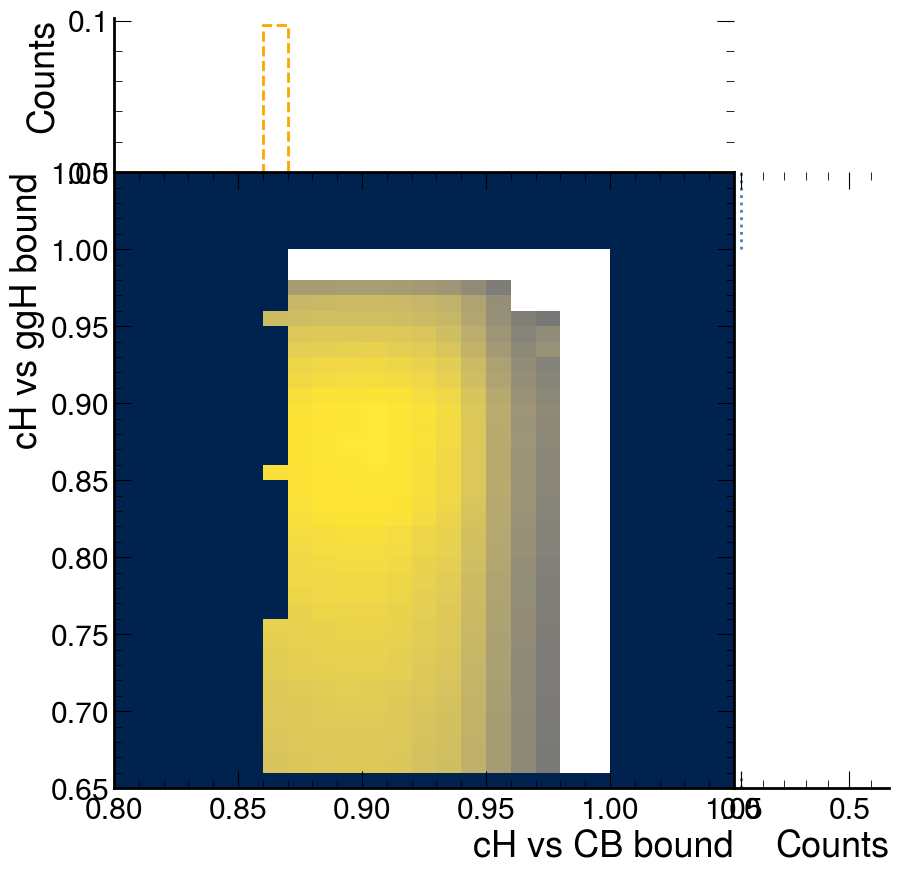

In [47]:
h = hist.NamedHist(
    hist.axis.Regular(
        25, 0.8, 1.05, name="CB", label="cH vs CB bound", underflow=False, overflow=False
    ),
    hist.axis.Regular(
        40, 0.65, 1.05, name="GGH", label="cH vs ggH bound", underflow=False, overflow=False
    ),
)
# full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
h.fill(CB=bound_cb, GGH=bound_ggh, weight=tot)
# plot2d full
h.plot2d_full(
    main_cmap="cividis",
    top_ls="--",
    top_color="orange",
    top_lw=2,
    side_ls=":",
    side_lw=2,
    side_color="steelblue",
)
plt.show()

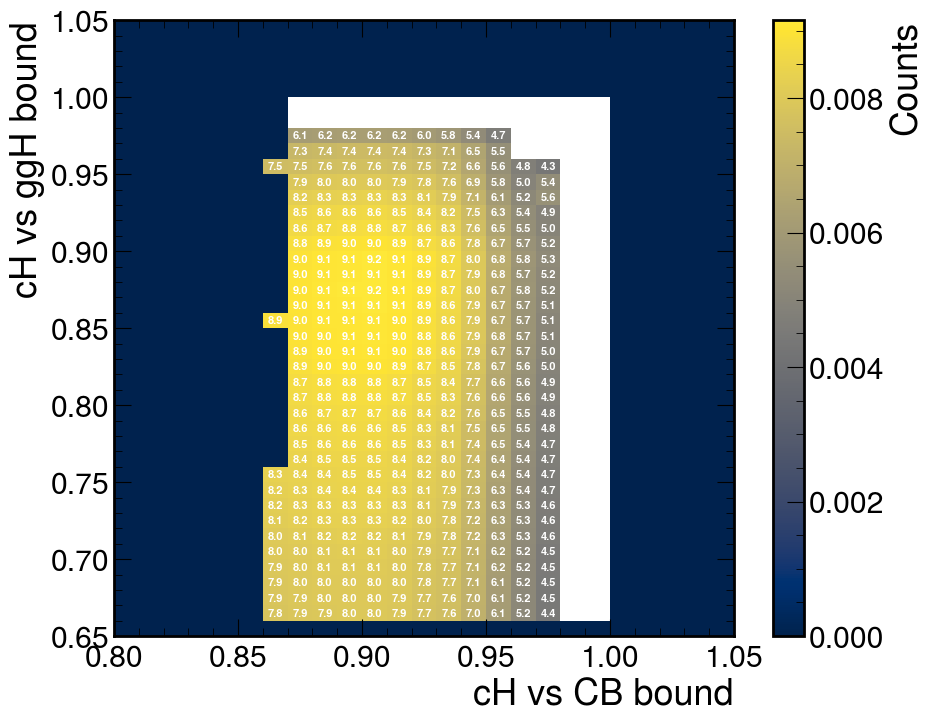

In [71]:
# Define the NamedHist object with the specified axes
h = hist.NamedHist(
    hist.axis.Regular(
        25, 0.8, 1.05, name="CB", label="cH vs CB bound", underflow=False, overflow=False
    ),
    hist.axis.Regular(
        40, 0.65, 1.05, name="GGH", label="cH vs ggH bound", underflow=False, overflow=False
    ),
)

# Fill the histogram with cleaned data
h.fill(CB=bound_cb, GGH=bound_ggh, weight=tot)

# Extract bin centers and values
x_centers = h.axes[0].centers
y_centers = h.axes[1].centers
values = h.view()

# Plot the 2D histogram using Matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
pcm = ax.pcolormesh(h.axes[0].edges, h.axes[1].edges, values.T, cmap="cividis")

# Add color bar
plt.colorbar(pcm, ax=ax, label='Counts')

# Annotate each bin with its value
for i, x in enumerate(x_centers):
    for j, y in enumerate(y_centers):
        value = values[i, j]
        if value > 0:  # Only annotate bins with non-zero values
            ax.text(x, y, f'{value*1000:.1f}', ha='center', va='center', color='white', fontsize=8, fontweight='bold')

# Set axis labels
ax.set_xlabel("cH vs CB bound")
ax.set_ylabel("cH vs ggH bound")

# Display the plot
plt.show()

In [74]:
print(tot[:5], sig_like[:5])

[0.007820244365689894, 0.007860946338447217, 0.007899575612784877, 0.00793881510654737, 0.00798875180317614] [0.0048932525641171, 0.0048837421217164945, 0.004873166638247793, 0.0048600507690282025, 0.00484980371525915]


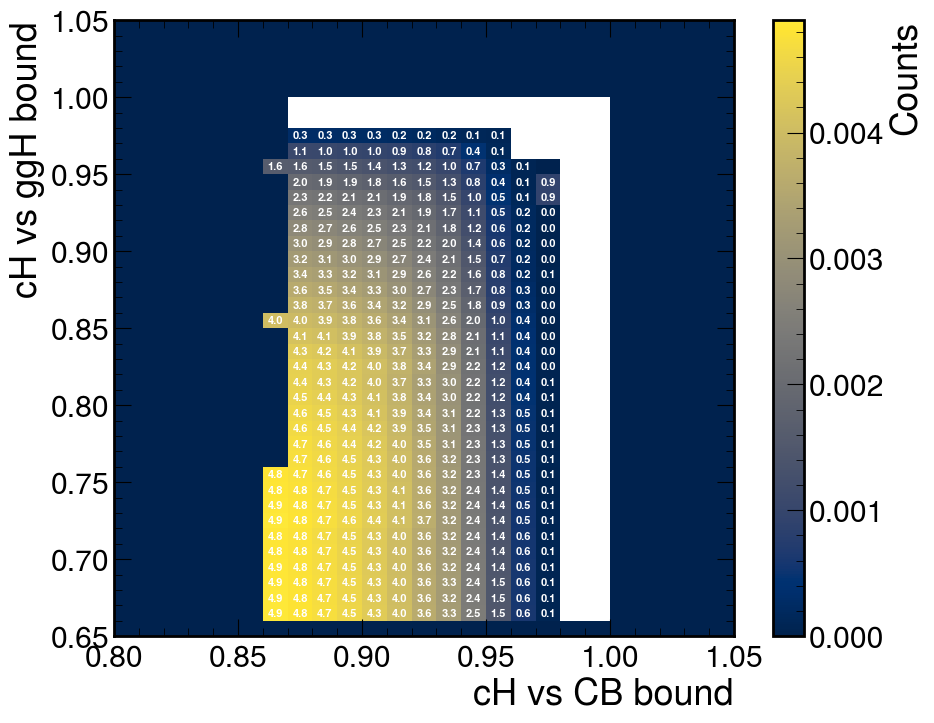

In [75]:
h_sig = hist.NamedHist(
    hist.axis.Regular(
        25, 0.8, 1.05, name="CB", label="cH vs CB bound", underflow=False, overflow=False
    ),
    hist.axis.Regular(
        40, 0.65, 1.05, name="GGH", label="cH vs ggH bound", underflow=False, overflow=False
    ),
)
# full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
h_sig.fill(CB=bound_cb, GGH=bound_ggh, weight=sig_like)

# Extract bin centers and values
x_centers = h_sig.axes[0].centers
y_centers = h_sig.axes[1].centers
values = h_sig.view()

# Plot the 2D histogram using Matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
pcm = ax.pcolormesh(h_sig.axes[0].edges, h_sig.axes[1].edges, values.T, cmap="cividis")

# Add color bar
plt.colorbar(pcm, ax=ax, label='Counts')

# Annotate each bin with its value
for i, x in enumerate(x_centers):
    for j, y in enumerate(y_centers):
        value = values[i, j]
        if value > 0:  # Only annotate bins with non-zero values
            ax.text(x, y, f'{value*1000:.1f}', ha='center', va='center', color='white', fontsize=8, fontweight='bold')

# Set axis labels
ax.set_xlabel("cH vs CB bound")
ax.set_ylabel("cH vs ggH bound")

# Display the plot
plt.show()

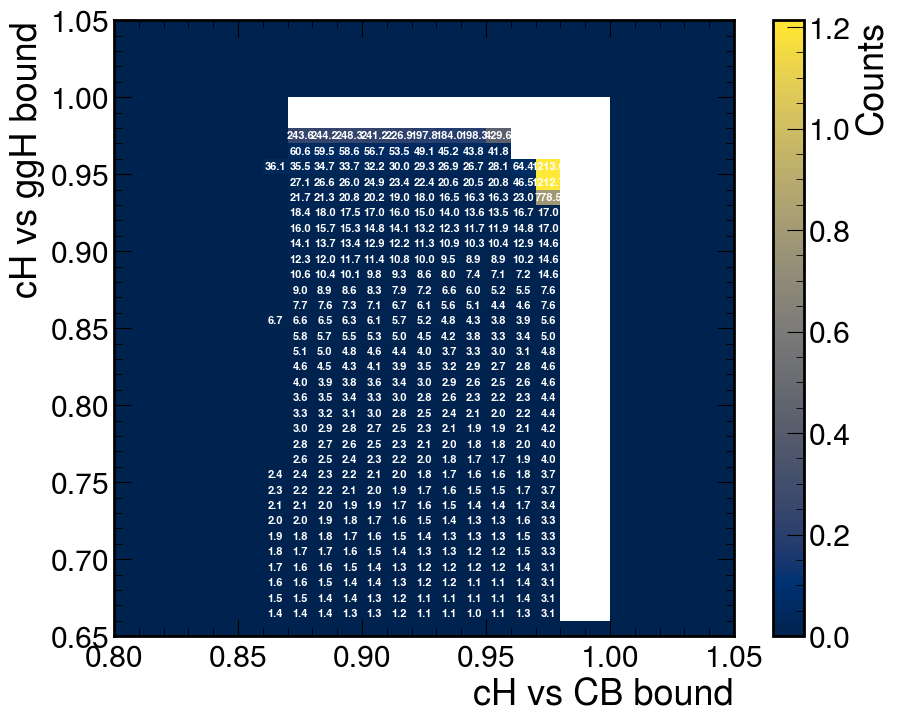

In [77]:
h_sig = hist.NamedHist(
    hist.axis.Regular(
         25, 0.8, 1.05, name="CB", label="cH vs CB bound", underflow=False, overflow=False
    ),
    hist.axis.Regular(
        40, 0.65, 1.05, name="GGH", label="cH vs ggH bound", underflow=False, overflow=False
    ),
)
# full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
h_sig.fill(CB=bound_cb, GGH=bound_ggh, weight=bkg_sig_like)

# Extract bin centers and values
x_centers = h_sig.axes[0].centers
y_centers = h_sig.axes[1].centers
values = h_sig.view()

# Plot the 2D histogram using Matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
pcm = ax.pcolormesh(h_sig.axes[0].edges, h_sig.axes[1].edges, values.T, cmap="cividis")

# Add color bar
plt.colorbar(pcm, ax=ax, label='Counts')

# Annotate each bin with its value
for i, x in enumerate(x_centers):
    for j, y in enumerate(y_centers):
        value = values[i, j]
        if value > 0:  # Only annotate bins with non-zero values
            ax.text(x, y, f'{value*1000:.1f}', ha='center', va='center', color='white', fontsize=8, fontweight='bold')

# Set axis labels
ax.set_xlabel("cH vs CB bound")
ax.set_ylabel("cH vs ggH bound")

# Display the plot
plt.show()

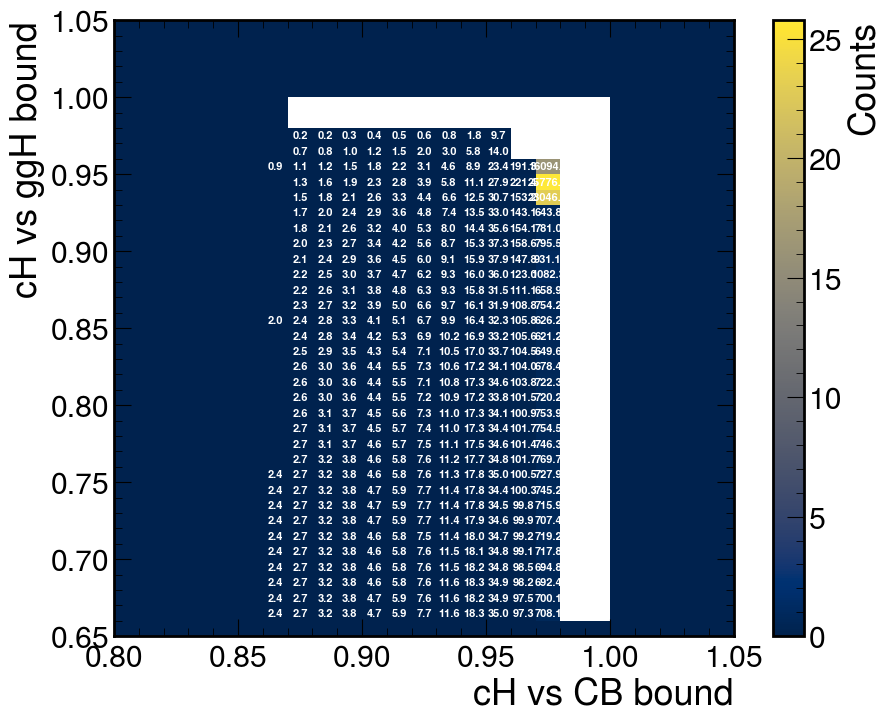

In [78]:
h_sig = hist.NamedHist(
    hist.axis.Regular(
         25, 0.8, 1.05, name="CB", label="cH vs CB bound", underflow=False, overflow=False
    ),
    hist.axis.Regular(
        40, 0.65, 1.05, name="GGH", label="cH vs ggH bound", underflow=False, overflow=False
    ),
)
# full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
h_sig.fill(CB=bound_cb, GGH=bound_ggh, weight=sig_bkg_like)

# Extract bin centers and values
x_centers = h_sig.axes[0].centers
y_centers = h_sig.axes[1].centers
values = h_sig.view()

# Plot the 2D histogram using Matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
pcm = ax.pcolormesh(h_sig.axes[0].edges, h_sig.axes[1].edges, values.T, cmap="cividis")

# Add color bar
plt.colorbar(pcm, ax=ax, label='Counts')

# Annotate each bin with its value
for i, x in enumerate(x_centers):
    for j, y in enumerate(y_centers):
        value = values[i, j]
        if value > 0:  # Only annotate bins with non-zero values
            ax.text(x, y, f'{value*1000:.1f}', ha='center', va='center', color='white', fontsize=8, fontweight='bold')

# Set axis labels
ax.set_xlabel("cH vs CB bound")
ax.set_ylabel("cH vs ggH bound")

# Display the plot
plt.show()

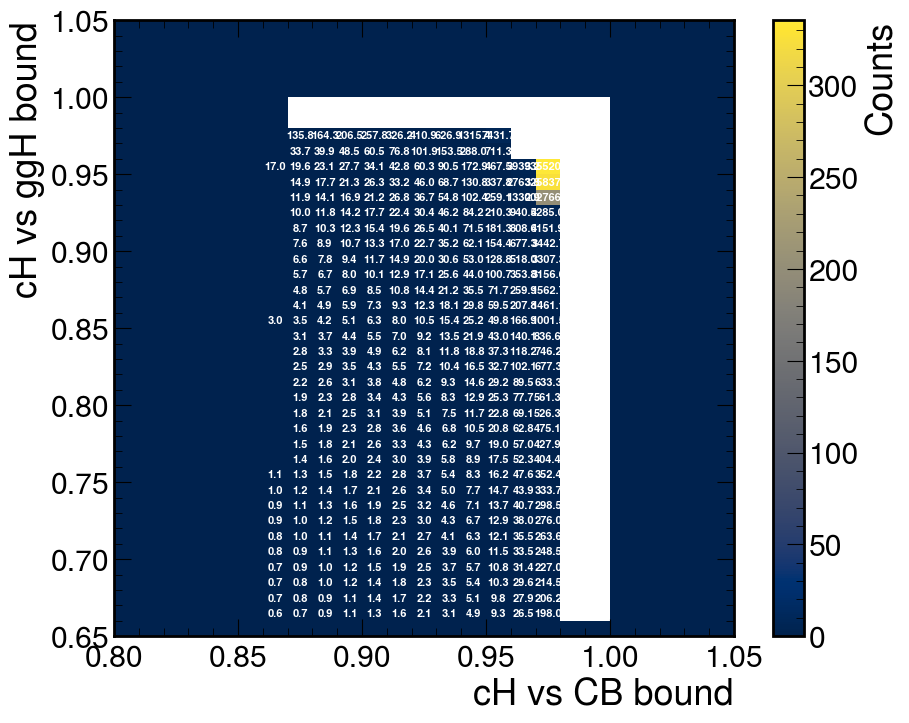

In [79]:
h_sig = hist.NamedHist(
    hist.axis.Regular(
         25, 0.8, 1.05, name="CB", label="cH vs CB bound", underflow=False, overflow=False
    ),
    hist.axis.Regular(
        40, 0.65, 1.05, name="GGH", label="cH vs ggH bound", underflow=False, overflow=False
    ),
)
# full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
h_sig.fill(CB=bound_cb, GGH=bound_ggh, weight=bkg_like)

# Extract bin centers and values
x_centers = h_sig.axes[0].centers
y_centers = h_sig.axes[1].centers
values = h_sig.view()

# Plot the 2D histogram using Matplotlib
fig, ax = plt.subplots(figsize=(10, 8))
pcm = ax.pcolormesh(h_sig.axes[0].edges, h_sig.axes[1].edges, values.T, cmap="cividis")

# Add color bar
plt.colorbar(pcm, ax=ax, label='Counts')

# Annotate each bin with its value
for i, x in enumerate(x_centers):
    for j, y in enumerate(y_centers):
        value = values[i, j]
        if value > 0:  # Only annotate bins with non-zero values
            ax.text(x, y, f'{value*1000:.1f}', ha='center', va='center', color='white', fontsize=8, fontweight='bold')

# Set axis labels
ax.set_xlabel("cH vs CB bound")
ax.set_ylabel("cH vs ggH bound")

# Display the plot
plt.show()

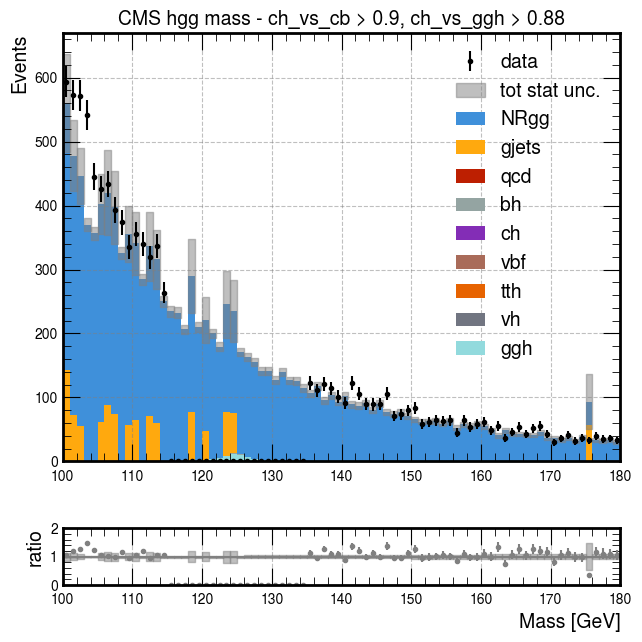

In [100]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "CMS_hgg_mass"
min_ = 100.
max_ = 180
nbins = 80

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

norm = {}
sum = 0. 
title = "" 
for x in var.split("_"):     
    title += f"{x} "

cb_bound = 0.9
ggh_bound = 0.88
title = title + f"- ch_vs_cb > {cb_bound}, ch_vs_ggh > {ggh_bound}"
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    mask_cb = (fileset[sample]["bdt_score"] >= cb_bound) & (fileset[sample]["bdt_score"] <= 1)
    mask_ggh = (fileset[sample]["ch_vs_ggh_bdt_v2_score"] >= ggh_bound) & (fileset[sample]["ch_vs_ggh_bdt_v2_score"] <= 1)

    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="tot")

mask_cb = (fileset_data["data"]["bdt_score"] >= cb_bound) & (fileset_data["data"]["bdt_score"] <= 1)
mask_ggh = (fileset_data["data"]["ch_vs_ggh_bdt_v2_score"] >= ggh_bound) & (fileset_data["data"]["ch_vs_ggh_bdt_v2_score"] <= 1)
data_hist.fill(ax = fileset_data["data"][var][(mask_data) & (mask_cb) & (mask_ggh)], weight = ak.ones_like(fileset_data["data"][var][(mask_data) & (mask_cb) & (mask_ggh)]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
# ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color=colours[j], marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('Mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

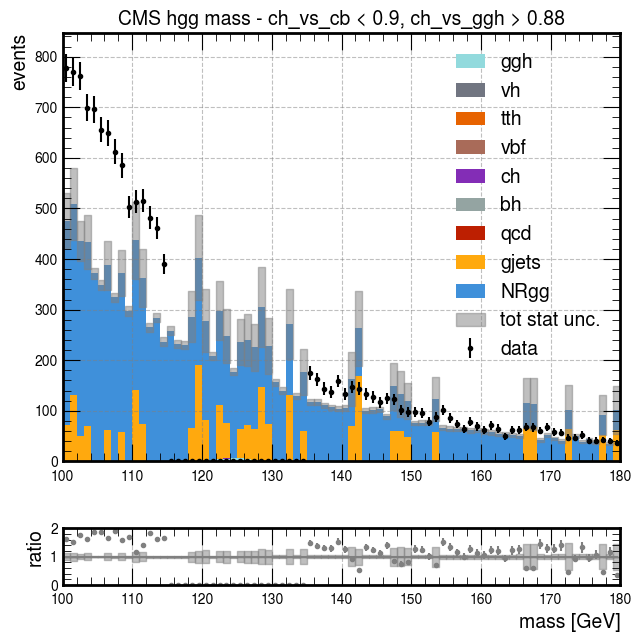

In [101]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "CMS_hgg_mass"
min_ = 100.
max_ = 180
nbins = 80

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

norm = {}
sum = 0. 
title = "" 
for x in var.split("_"):     
    title += f"{x} "

cb_low_bound = 0.8
ggh_low_bound = 0.6
title = title + f"- ch_vs_cb < {cb_bound}, ch_vs_ggh > {ggh_bound}"
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    mask_cb = (fileset[sample]["bdt_score"] >= cb_low_bound) & (fileset[sample]["bdt_score"] < cb_bound)
    mask_ggh = (fileset[sample]["ch_vs_ggh_bdt_v2_score"] >= ggh_bound) & (fileset[sample]["ch_vs_ggh_bdt_v2_score"] <= 1)

    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="tot")

mask_cb = (fileset_data["data"]["bdt_score"] >= cb_low_bound) & (fileset_data["data"]["bdt_score"] < cb_bound)
mask_ggh = (fileset_data["data"]["ch_vs_ggh_bdt_v2_score"] >= ggh_bound) & (fileset_data["data"]["ch_vs_ggh_bdt_v2_score"] <= 1)
data_hist.fill(ax = fileset_data["data"][var][(mask_data) & (mask_cb) & (mask_ggh)], weight = ak.ones_like(fileset_data["data"][var][(mask_data) & (mask_cb) & (mask_ggh)]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color=colours[j], marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

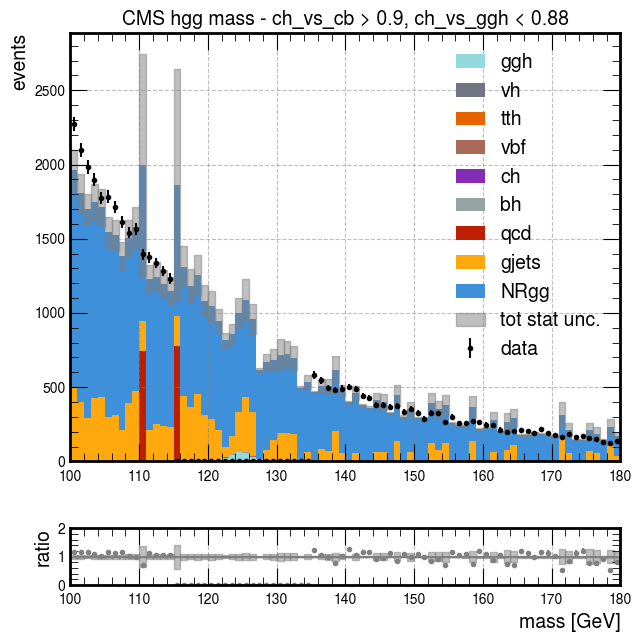

In [102]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "CMS_hgg_mass"
min_ = 100.
max_ = 180
nbins = 80

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

norm = {}
sum = 0. 
title = "" 
for x in var.split("_"):     
    title += f"{x} "

title = title + f"- ch_vs_cb > {cb_bound}, ch_vs_ggh < {ggh_bound}"
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    mask_cb = (fileset[sample]["bdt_score"] >= cb_bound) & (fileset[sample]["bdt_score"] <= 1)
    mask_ggh = (fileset[sample]["ch_vs_ggh_bdt_v2_score"] >= ggh_low_bound) & (fileset[sample]["ch_vs_ggh_bdt_v2_score"] < ggh_bound)

    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="tot")

mask_cb = (fileset_data["data"]["bdt_score"] >= cb_bound) & (fileset_data["data"]["bdt_score"] <= 1)
mask_ggh = (fileset_data["data"]["ch_vs_ggh_bdt_v2_score"] >= ggh_low_bound) & (fileset_data["data"]["ch_vs_ggh_bdt_v2_score"] < ggh_bound)
data_hist.fill(ax = fileset_data["data"][var][(mask_data) & (mask_cb) & (mask_ggh)], weight = ak.ones_like(fileset_data["data"][var][(mask_data) & (mask_cb) & (mask_ggh)]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color=colours[j], marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

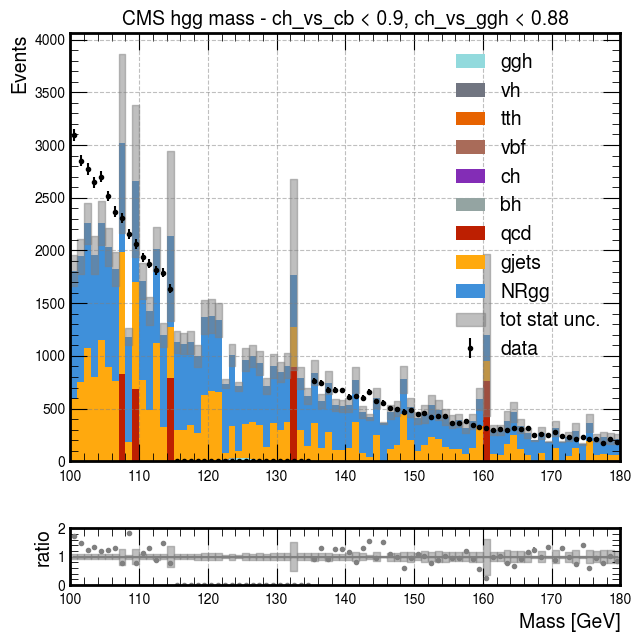

In [103]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "CMS_hgg_mass"
min_ = 100.
max_ = 180
nbins = 80

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

norm = {}
sum = 0. 
title = "" 
for x in var.split("_"):     
    title += f"{x} "

title = title + f"- ch_vs_cb < {cb_bound}, ch_vs_ggh < {ggh_bound}"
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    mask_cb = (fileset[sample]["bdt_score"] >= cb_low_bound) & (fileset[sample]["bdt_score"] < cb_bound)
    mask_ggh = (fileset[sample]["ch_vs_ggh_bdt_v2_score"] >= ggh_low_bound) & (fileset[sample]["ch_vs_ggh_bdt_v2_score"] < ggh_bound)

    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="tot")

mask_cb = (fileset_data["data"]["bdt_score"] >= cb_low_bound) & (fileset_data["data"]["bdt_score"] < cb_bound)
mask_ggh = (fileset_data["data"]["ch_vs_ggh_bdt_v2_score"] >= ggh_low_bound) & (fileset_data["data"]["ch_vs_ggh_bdt_v2_score"] < ggh_bound)
data_hist.fill(ax = fileset_data["data"][var][(mask_data) & (mask_cb) & (mask_ggh)], weight = ak.ones_like(fileset_data["data"][var][(mask_data) & (mask_cb) & (mask_ggh)]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color=colours[j], marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('Mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

# Total significance

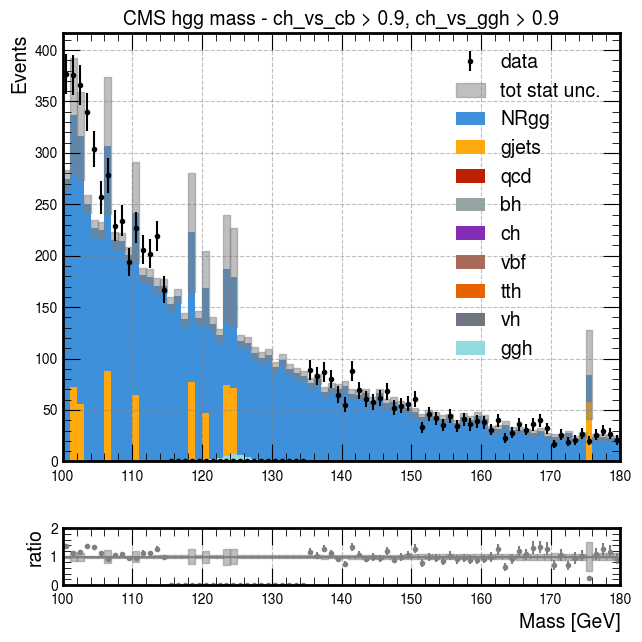

In [104]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "CMS_hgg_mass"
min_ = 100.
max_ = 180
nbins = 80

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

norm = {}
sum = 0. 
title = "" 
for x in var.split("_"):     
    title += f"{x} "

cb_bound = 0.9
ggh_bound = 0.9
title = title + f"- ch_vs_cb > {cb_bound}, ch_vs_ggh > {ggh_bound}"
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    mask_cb = (fileset[sample]["bdt_score"] >= cb_bound) & (fileset[sample]["bdt_score"] <= 1)
    mask_ggh = (fileset[sample]["ch_vs_ggh_bdt_v2_score"] >= ggh_bound) & (fileset[sample]["ch_vs_ggh_bdt_v2_score"] <= 1)

    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="tot")

mask_cb = (fileset_data["data"]["bdt_score"] >= cb_bound) & (fileset_data["data"]["bdt_score"] <= 1)
mask_ggh = (fileset_data["data"]["ch_vs_ggh_bdt_v2_score"] >= ggh_bound) & (fileset_data["data"]["ch_vs_ggh_bdt_v2_score"] <= 1)
data_hist.fill(ax = fileset_data["data"][var][(mask_data) & (mask_cb) & (mask_ggh)], weight = ak.ones_like(fileset_data["data"][var][(mask_data) & (mask_cb) & (mask_ggh)]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
# ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# Style
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles[::-1], labels[::-1], prop={'size': 14})
#hep.cms.label()

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)

ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color=colours[j], marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('Mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

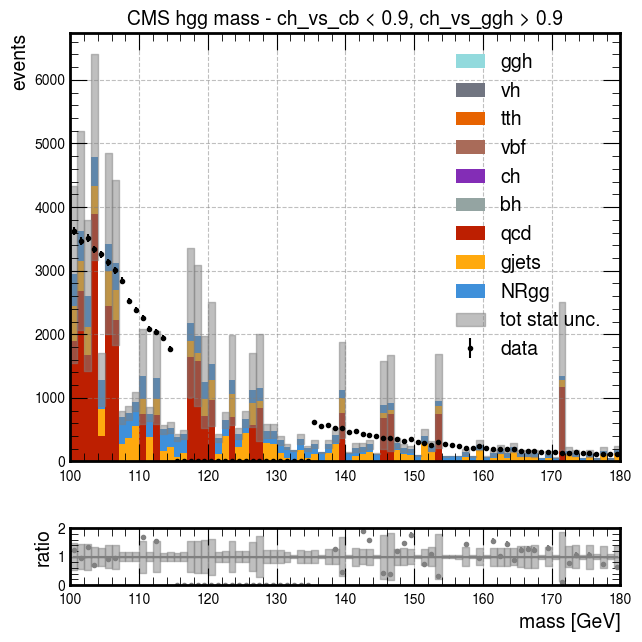

In [155]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "CMS_hgg_mass"
min_ = 100.
max_ = 180
nbins = 80

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

norm = {}
sum = 0. 
title = "" 
for x in var.split("_"):     
    title += f"{x} "

cb_bound = 0.9
ggh_bound = 0.9
title = title + f"- ch_vs_cb < {cb_bound}, ch_vs_ggh > {ggh_bound}"
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    mask_cb = (fileset[sample]["bdt_score"] >= 0) & (fileset[sample]["bdt_score"] < cb_bound)
    mask_ggh = (fileset[sample]["ch_vs_ggh_bdt_v2_score"] >= ggh_bound) & (fileset[sample]["ch_vs_ggh_bdt_v2_score"] <= 1)

    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="tot")

mask_cb = (fileset_data["data"]["bdt_score"] >= 0) & (fileset_data["data"]["bdt_score"] < cb_bound)
mask_ggh = (fileset_data["data"]["ch_vs_ggh_bdt_v2_score"] >= ggh_bound) & (fileset_data["data"]["ch_vs_ggh_bdt_v2_score"] <= 1)
data_hist.fill(ax = fileset_data["data"][var][(mask_data) & (mask_cb) & (mask_ggh)], weight = ak.ones_like(fileset_data["data"][var][(mask_data) & (mask_cb) & (mask_ggh)]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color=colours[j], marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

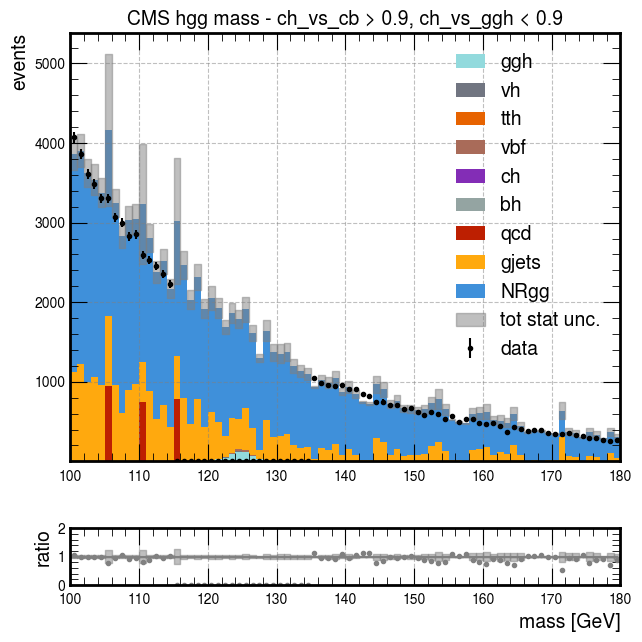

In [156]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "CMS_hgg_mass"
min_ = 100.
max_ = 180
nbins = 80

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)

norm = {}
sum = 0. 
title = "" 
for x in var.split("_"):     
    title += f"{x} "

cb_bound = 0.9
ggh_bound = 0.9
title = title + f"- ch_vs_cb > {cb_bound}, ch_vs_ggh < {ggh_bound}"
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    mask_cb = (fileset[sample]["bdt_score"] >= cb_bound) & (fileset[sample]["bdt_score"] <= 1)
    mask_ggh = (fileset[sample]["ch_vs_ggh_bdt_v2_score"] >= 0) & (fileset[sample]["ch_vs_ggh_bdt_v2_score"] < ggh_bound)

    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="tot")

mask_cb = (fileset_data["data"]["bdt_score"] >= cb_bound) & (fileset_data["data"]["bdt_score"] <= 1)
mask_ggh = (fileset_data["data"]["ch_vs_ggh_bdt_v2_score"] >= 0) & (fileset_data["data"]["ch_vs_ggh_bdt_v2_score"] < ggh_bound)
data_hist.fill(ax = fileset_data["data"][var][(mask_data) & (mask_cb) & (mask_ggh)], weight = ak.ones_like(fileset_data["data"][var][(mask_data) & (mask_cb) & (mask_ggh)]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color=colours[j], marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

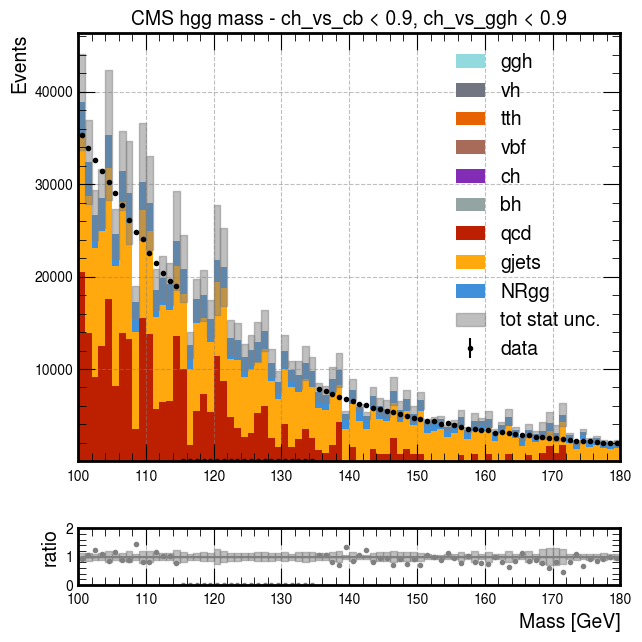

In [157]:
# lead photon eta
fig = plt.figure(figsize=(7, 7))
ax0 = plt.subplot2grid((5, 3), (0, 0), rowspan=4, colspan=3)

var = "CMS_hgg_mass"
min_ = 100.
max_ = 180
nbins = 80

LeadPhoton_et_ax  = hist.axis.Regular(nbins, min_, max_, flow=False, name="ax")
LeadPhoton_et_cax = hist.axis.StrCategory(["NRgg", "gjets", "qcd", "bh", "ch", "vbf", "tth", "vh",  "ggh"], name="c")
LeadPhoton_et_cax_data = hist.axis.StrCategory(["data"], name="c")
LeadPhoton_et_cax_tot = hist.axis.StrCategory(["tot"], name="c")
full_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
full_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax)
data_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_data)
tot_hist = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)
tot_hist_err = hist.Hist(LeadPhoton_et_ax, LeadPhoton_et_cax_tot)


norm = {}
sum = 0. 
title = "" 
for x in var.split("_"):     
    title += f"{x} "

cb_bound = 0.9
ggh_bound = 0.9
title = title + f"- ch_vs_cb < {cb_bound}, ch_vs_ggh < {ggh_bound}"
tmp_gjets = 0
tmp_gg = 0
tmp_qcd = 0

for sample in [*fileset]:
    if ("gjets" in sample):
        tmp_gjets += ak.sum(fileset[sample].weight_norm)
    elif "ggNR" in sample:
        tmp_gg += ak.sum(fileset[sample].weight_norm)
    elif "qcd" in sample:
        tmp_qcd += ak.sum(fileset[sample].weight_norm)
    sum += ak.sum(fileset[sample].weight_norm)
    norm[sample] = ak.sum(fileset[sample].weight_norm)
    fileset[sample]["square_weight"] = (fileset[sample].weight_norm) ** 2
norm["tot"] = sum
norm["gjets"] = tmp_gjets
norm["NRgg"] = tmp_gg
norm["qcd"] = tmp_qcd


for sample in [*fileset]:
    mask_cb = (fileset[sample]["bdt_score"] >= 0) & (fileset[sample]["bdt_score"] < cb_bound)
    mask_ggh = (fileset[sample]["ch_vs_ggh_bdt_v2_score"] >= 0) & (fileset[sample]["ch_vs_ggh_bdt_v2_score"] < ggh_bound)

    if ("gjets" not in sample) and ("ggNR" not in sample) and ("qcd" not in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c=sample)
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c=sample)
    elif ("ggNR" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="NRgg")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="NRgg")
    elif ("gjets" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="gjets")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="gjets")
    elif ("qcd" in sample):
        full_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="qcd")
        full_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="qcd")
    tot_hist.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["weight_norm"][(mask_cb) & (mask_ggh)], c="tot")
    tot_hist_err.fill(ax = fileset[sample][var][(mask_cb) & (mask_ggh)], weight = fileset[sample]["square_weight"][(mask_cb) & (mask_ggh)], c="tot")

mask_cb = (fileset_data["data"]["bdt_score"] >= 0) & (fileset_data["data"]["bdt_score"] < cb_bound)
mask_ggh = (fileset_data["data"]["ch_vs_ggh_bdt_v2_score"] >= 0) & (fileset_data["data"]["ch_vs_ggh_bdt_v2_score"] < ggh_bound)
data_hist.fill(ax = fileset_data["data"][var][(mask_data) & (mask_cb) & (mask_ggh)], weight = ak.ones_like(fileset_data["data"][var][(mask_data) & (mask_cb) & (mask_ggh)]), c="data")

h_stack = full_hist.stack("c")
h_stack_err = full_hist_err.stack("c")

stack = True
h_stack[::-1].plot(ax=ax0, stack=stack, histtype="fill")
# h_sig.project("ax").plot(ax=ax0, color="red", label="signal x 300")

mc = {}
mc["bins"] = {}
mc["errs"] = {}
mc["edges"] = {}

tot = {}
tot["bins"] = {}
tot["errs"] = {}
tot["edges"] = {}

data = {}
data["bins"] = {}
data["errs"] = {}
data["edges"] = {}

# this is useful to manipulate bin content better when doing ratios and error plotting
for sample in [*full_hist.axes[1]]:
    mc["bins"][sample], mc["edges"][sample] = full_hist[:,sample].to_numpy()
    half_bin = np.abs((mc["edges"][sample][1] - mc["edges"][sample][0])) / 2
    mc["edges"][sample] = mc["edges"][sample] + half_bin
    mc["errs"][sample] = np.sqrt(full_hist_err[:,sample].to_numpy()[0])

for sample in [*data_hist.axes[1]]:
    data["bins"][sample], data["edges"][sample] = data_hist[:,sample].to_numpy()
    data["edges"][sample] = data["edges"][sample] + half_bin
    data["errs"][sample] = np.sqrt(data["bins"][sample])

for sample in [*tot_hist.axes[1]]:
    tot["bins"][sample], tot["edges"][sample] = tot_hist[:,sample].to_numpy()
    tot["edges"][sample] = tot["edges"][sample] + half_bin
    tot["errs"][sample] = np.sqrt(tot_hist_err[:,sample].to_numpy()[0])

ydn = {}
yup = {}
#create up and down edges to plot shaded area for each bin
for sample in [*full_hist.axes[1]]:
    ydn[sample] = [mc["bins"][sample][i] - x for i, x in enumerate(mc["errs"][sample])]
    yup[sample] = [mc["bins"][sample][i] + x for i, x in enumerate(mc["errs"][sample])]
for sample in [*tot_hist.axes[1]]:
    ydn[sample] = [tot["bins"][sample][i] - x for i, x in enumerate(tot["errs"][sample])]
    yup[sample] = [tot["bins"][sample][i] + x for i, x in enumerate(tot["errs"][sample])]


# plot shaded area for MC errors
colours = ["grey", "orchid", "brown",  "purple", "red",  "green",  "orange", "royalblue"]
for j, sample in enumerate([*full_hist.axes[1]]):
    if stack: break
    for i, x in enumerate(mc["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor=colours[j], alpha=0.5, edgecolor=colours[j], label="")
for sample in [*tot_hist.axes[1]]:
    if not stack: break
    for i, x in enumerate(tot["edges"][sample][:-1]):
        if i == 0:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label=f"{sample} stat unc.") # we want just one entry in the legend
        else:
            ax0.fill_between([x - half_bin, x + half_bin], [ydn[sample][i], ydn[sample][i]], [yup[sample][i], yup[sample][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="")

for sample in [*data_hist.axes[1]]:
    ax0.errorbar(data["edges"][sample][:-1], data["bins"][sample], yerr = data["errs"][sample], color="black", marker=".", linestyle="", label=sample)

# cosmetics
ax0.set_ylabel('Events', fontsize=14)
ax0.set_xlabel('', fontsize=1)
ax0.set_title(title, fontsize=14)
ax0.tick_params(axis='x', labelsize=10)
ax0.tick_params(axis='y', labelsize=10)

# plot error bars
# ax0.errorbar(edges_data, mc["bins"]["tot"], yerr=mc["errs"]["tot"] , color="gray", marker="_", linestyle="")
ax0.legend( prop={'size': 14})
ax0.grid(color='grey', linestyle='--', alpha=0.5)

# ratio plot
ax1 = plt.subplot2grid((5, 3), (4, 0), rowspan=1, colspan=3)
ax1.grid(color='grey', linestyle='--', alpha=0.5)


ratio = ak.where(
        tot["bins"]["tot"] != 0,
        data["bins"]["data"] / tot["bins"]["tot"],
        ak.ones_like(tot["bins"]["tot"])
)
ax1.plot(tot["edges"]["tot"][:-1], ak.ones_like(tot["bins"]["tot"]), color="grey", marker="_", linestyle="-", label="mc")
ax1.errorbar(tot["edges"]["tot"][:-1], ratio, yerr = abs(data["errs"]["data"]/tot["bins"]["tot"]), color=colours[j], marker=".", linestyle="", label=sample)
for i, x in enumerate(mc["edges"]["ggh"][:-1]):
    ax1.fill_between([x - half_bin, x + half_bin], [ydn["tot"][i]/tot["bins"]["tot"][i], ydn["tot"][i]/tot["bins"]["tot"][i]], [yup["tot"][i]/tot["bins"]["tot"][i], yup["tot"][i]/tot["bins"]["tot"][i]], facecolor="grey", alpha=0.5, edgecolor="grey", label="MC stat unc.")

ax1.set_ylim([0.,2])
ax1.set_xlim([min_, max_])
ax0.set_xlim([min_, max_])
ax1.set_xlabel('Mass [GeV]', fontsize=14)
ax1.set_ylabel('ratio', fontsize=14)
ax1.tick_params(axis='x', labelsize=10)
ax1.tick_params(axis='y', labelsize=10)
plt.tight_layout()
    
plt.plot()
plt.show()
# plt.savefig(f"plots/mva_score_dist_{model_name}.pdf")

# Signal efficiency

  Regular(11, 0, 1.1, underflow=False, overflow=False, name='CB', label='cH vs CB bound'),
  Regular(11, 0, 1.1, underflow=False, overflow=False, name='GGH', label='cH vs ggH bound'),
  storage=Double()) # Sum: 0.17597084464827084


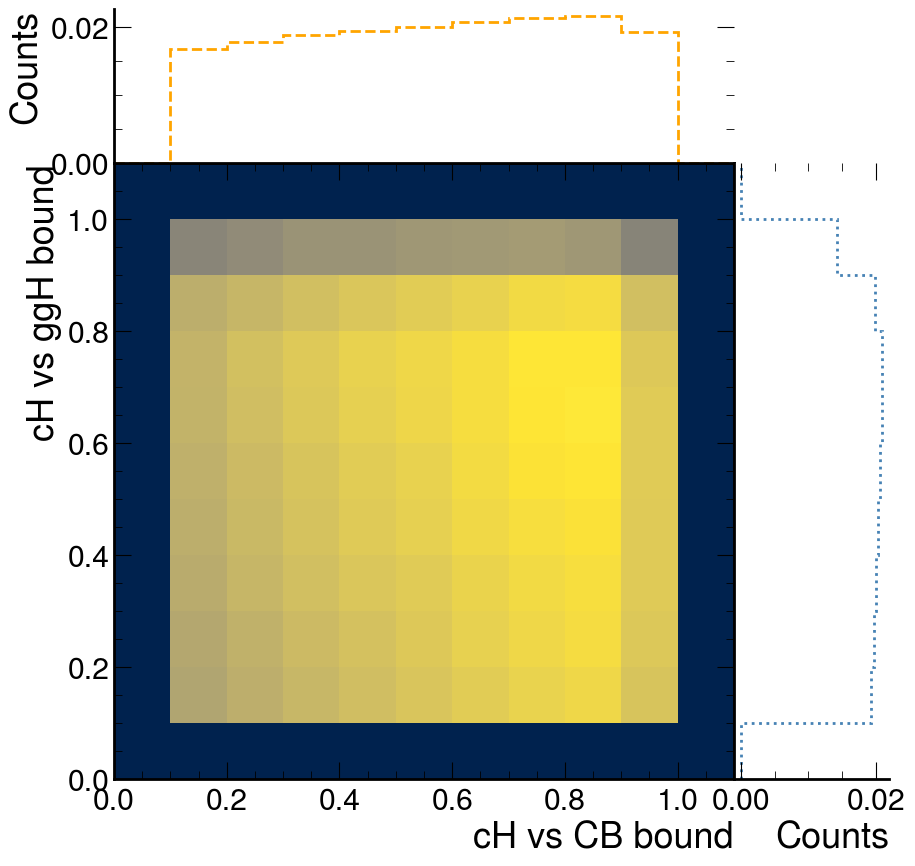

In [158]:
h = hist.NamedHist(
    hist.axis.Regular(
        11, 0, 1.1, name="CB", label="cH vs CB bound", underflow=False, overflow=False
    ),
    hist.axis.Regular(
        11, 0, 1.1, name="GGH", label="cH vs ggH bound", underflow=False, overflow=False
    ),
)
# full_hist_err.fill(ax = fileset[sample][var][mask_MC[sample]], weight = fileset[sample]["square_weight"][mask_MC[sample]], c=sample)
h.fill(CB=bound_cb, GGH=bound_ggh, weight=eff_sig_like)
# plot2d full
h.plot2d_full(
    main_cmap="cividis",
    top_ls="--",
    top_color="orange",
    top_lw=2,
    side_ls=":",
    side_lw=2,
    side_color="steelblue",
)
plt.show()

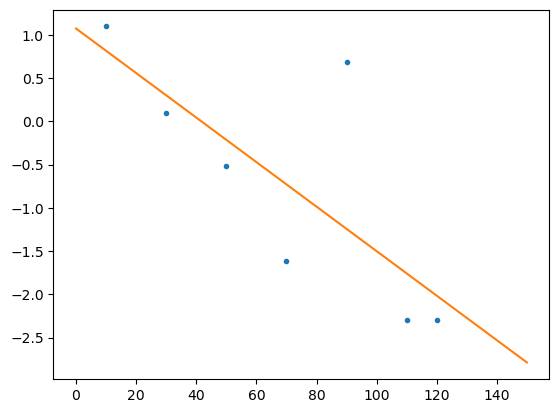

1.0751119571392904


In [8]:
import matplotlib.pyplot as plt
import numpy as np

h_inf = 15.1
#x = [10, 30, 50, 70, 90, 110, 120]
x = [10, 30, 50, 70, 90, 110, 120]
# y= [12.1, 14, 14.5, 14.9, 13.1, 15.1, 15.1]
y = [12.1, 14, 14.5, 14.9,  13.1, 15, 15]
y_log = [np.log(i) for i in y]
y_hinf = [h_inf - i for i in y]
y_hinf_log = [np.log(i) for i in y_hinf]
z = np.polyfit(x, y_hinf_log, 1)
xp = np.linspace(0, 150, 100)
p = np.poly1d(z)
_ = plt.plot(x, y_hinf_log, '.', xp, p(xp), '-')
#plt.yscale('log')
plt.show()
h2=p(0)
print(p(0))

In [9]:
(h_inf-np.e**h2-29.8)/(h_inf-29.8)

1.1993415613959542